In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np

In [2]:
import json

with open('/Users/abou48862/code/kvkirya/pt-ai/raw_data/annotations.json') as json_data:
    data = json.load(json_data)

In [3]:
df_images = pd.DataFrame(data["images"])
df_annotations = pd.DataFrame(data["annotations"])

In [4]:
df_images

,license,id,file_name,width,height,hdri_name,hdri_rotation_deg,camera_rotation_deg
0,0,1,00000001.rgb.png,640,480,construction_yard_4k.hdr,262.228967,78.472965
1,0,2,00000002.rgb.png,640,480,construction_yard_4k.hdr,167.524583,67.888454
2,0,3,00000003.rgb.png,640,480,construction_yard_4k.hdr,10.682487,73.478342
3,0,4,00000004.rgb.png,640,480,construction_yard_4k.hdr,27.743320,72.287580
4,0,5,00000005.rgb.png,640,480,construction_yard_4k.hdr,107.101225,68.926178
...,...,...,...,...,...,...,...,...
59573,0,59574,00059574.rgb.png,640,480,empty_warehouse_01_4k.hdr,321.167844,70.070446
59574,0,59575,00059575.rgb.png,640,480,empty_warehouse_01_4k.hdr,124.626978,63.659398
59575,0,59576,00059576.rgb.png,640,480,empty_warehouse_01_4k.hdr,237.013957,48.973143
59576,0,59577,00059577.rgb.png,640,480,empty_warehouse_01_4k.hdr,150.917579,70.161267


In [5]:
df_annotations

,category_id,image_id,id,iscrowd,color,area,segmentation,bbox,num_keypoints,keypoints,...,pose_category,exercise_category,cuboid_points,zaxis_rotation_deg,attire_top,attire_bottom,presenting_gender,waist_circumference,height,betas
0,0,1,1,0,"[0.09803921568627451, 0.09803921568627451, 0.4...",3075.7804,"[[493.0, 240.99, 485.01, 236.0, 484.0, 227.99,...","[439.01, 187.01, 56.98000000000002, 53.9800000...",14,"[0, 0, 0, 469, 193, 2, 465, 193, 2, 0, 0, 0, 0...",...,situp,[HIIT],"[[438, 186], [484, 186], [502, 194], [451, 194...",15.061740,raglanshirt,track,female,0.730767,1.649463,"[-0.03959597647190094, -0.5644581913948059, 0...."
1,0,1,2,0,"[0.8274509803921568, 0.8666666666666667, 0.894...",2857.8604,"[[151.0, 239.99, 148.0, 239.99, 146.01, 238.0,...","[142.01, 185.01, 51.98000000000002, 54.9800000...",14,"[0, 0, 0, 167, 188, 2, 163, 188, 2, 0, 0, 0, 0...",...,situp,[HIIT],"[[143, 184], [194, 184], [181, 191], [124, 191...",0.801464,raglanshirt,tights,male,0.852622,1.753723,"[0.7923352718353271, -1.2788528203964233, 1.24..."
2,0,1,3,0,"[0.5333333333333333, 1.0, 0.8]",6313.9804,"[[327.0, 258.99, 321.0, 258.99, 319.01, 257.0,...","[302.01, 97.01, 38.98000000000002, 161.9800000...",14,"[0, 0, 0, 324, 116, 2, 321, 116, 2, 0, 0, 0, 0...",...,tree,[Yoga],"[[301, 93], [340, 93], [342, 91], [300, 91], [...",-70.690204,tshirt,jeans,male,0.990933,1.766118,"[0.33408355712890625, 0.24142998456954956, -0...."
3,0,2,4,0,"[0.09803921568627451, 0.09803921568627451, 0.4...",10207.9404,"[[486.0, 185.99, 484.01, 182.0, 486.0, 180.01,...","[477.01, 113.01, 110.98000000000002, 91.98]",14,"[0, 0, 0, 485, 128, 2, 483, 132, 2, 0, 0, 0, 0...",...,sideplank,"[Yoga, HIIT]","[[478, 109], [580, 109], [613, 124], [497, 124...",-32.316700,raglanshirt,track,female,1.104884,1.744472,"[1.1612275838851929, 0.8204484581947327, -1.58..."
4,0,2,5,0,"[0.13333333333333333, 0.3333333333333333, 0.46...",23513.2404,"[[548.0, 338.99, 543.0, 338.99, 541.0, 336.99,...","[506.01, 99.01, 97.98000000000002, 239.9800000...",14,"[0, 0, 0, 577, 120, 2, 567, 118, 2, 0, 0, 0, 0...",...,curls,[HIIT],"[[512, 95], [603, 95], [632, 106], [531, 106],...",-32.057216,tshirt,jeans,male,0.935389,1.854919,"[-0.7777438163757324, -0.040555573999881744, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167939,0,59577,167940,0,"[0.8274509803921568, 0.8666666666666667, 0.894...",8632.1004,"[[494.0, 296.99, 487.0, 294.99, 484.0, 291.99,...","[398.01, 229.01, 126.98000000000002, 67.980000...",14,"[0, 0, 0, 410, 263, 2, 411, 265, 2, 0, 0, 0, 0...",...,hipbridge,"[Yoga, HIIT]","[[392, 223], [506, 218], [552, 251], [419, 257...",78.247364,tshirt,track,female,0.951058,1.687193,"[0.6385455131530762, 0.829331636428833, 0.9691..."
167940,0,59578,167941,0,"[0.09803921568627451, 0.09803921568627451, 0.4...",32710.4204,"[[453.0, 354.99, 447.0, 351.99, 440.0, 351.99,...","[249.01, 222.01, 245.98000000000002, 132.98000...",14,"[0, 0, 0, 484, 250, 2, 482, 252, 2, 0, 0, 0, 0...",...,plank,"[Yoga, HIIT]","[[255, 202], [466, 203], [505, 229], [232, 227...",65.123053,raglanshirt,shorts,male,1.046934,1.855765,"[-0.7987443804740906, 0.29380616545677185, 0.8..."
167941,0,59578,167942,0,"[0.13333333333333333, 0.3333333333333333, 0.46...",5325.0804,"[[319.0, 210.99, 316.0, 210.99, 307.0, 205.99,...","[290.01, 137.01, 71.98000000000002, 73.9800000...",14,"[0, 0, 0, 297, 193, 2, 296, 193, 2, 0, 0, 0, 0...",...,legraise,[HIIT],"[[293, 136], [360, 136], [364, 139], [286, 139...",76.773370,tank,shorts,male,0.893962,1.794887,"[0.008171923458576202, 0.0021372123155742884, ..."
167942,0,59578,167943,0,"[0.6, 0.0, 0.4]",5239.8804,"[[332.0, 249.99, 323.0, 247.99, 317.0, 241.99,...","[297.01, 201.01, 106.98000000000002, 48.980000...",14,"[0, 0, 0, 308, 229, 2, 306, 230, 2, 0, 0, 0, 0...",...,hipbridge,"[Yoga, HIIT]","[[298, 198], [413, 199], [420, 206], [294, 206...",78.301114,tank,shorts,male,0.818586,1.795573,"[0.2891143262386322, -1.4047441482543945, 0.37..."


In [6]:
df_annotations.drop(columns = "id", axis = 0, inplace = True)
df_annotations.rename(columns = {"image_id" : "id"}, inplace = True)
len(df_annotations)

167944

In [7]:
#dataset with every single different character in it
df_complete = pd.merge(df_annotations, df_images, on = "id")
df_complete = df_complete[['id', 'file_name', 'pose_variation',
       'pose_category', 'exercise_category', 'bbox', "camera_rotation_deg"]]
df_complete.iloc[0:6]

,id,file_name,pose_variation,pose_category,exercise_category,bbox,camera_rotation_deg
0,1,00000001.rgb.png,situp,situp,[HIIT],"[439.01, 187.01, 56.98000000000002, 53.9800000...",78.472965
1,1,00000001.rgb.png,situp,situp,[HIIT],"[142.01, 185.01, 51.98000000000002, 54.9800000...",78.472965
2,1,00000001.rgb.png,tree_right,tree,[Yoga],"[302.01, 97.01, 38.98000000000002, 161.9800000...",78.472965
3,2,00000002.rgb.png,sideplank_right,sideplank,"[Yoga, HIIT]","[477.01, 113.01, 110.98000000000002, 91.98]",67.888454
4,2,00000002.rgb.png,curls_right,curls,[HIIT],"[506.01, 99.01, 97.98000000000002, 239.9800000...",67.888454
5,2,00000002.rgb.png,updog,updog,[Yoga],"[56.01, 118.01, 44.98, 67.98]",67.888454


In [8]:
#so now we need to check wether overlaps
#the bounding boxes are in COCO format so [x_min, y_min, width, height]

#convert coco to pascal_voc so to [x_min, y_min, x_max, y_max]
def coco_to_pascal(X):
    return [X[0], X[1], X[0] + X[2], X[1] + X[3]]

In [9]:
coco_to_pascal([439.01, 187.01, 56.98000000000002, 53.98000000000002])

[439.01, 187.01, 495.99, 240.99]

In [83]:
df_complete["bbox_pascal"] = df_complete["bbox"].apply(coco_to_pascal)
df_complete["index"] = range(1, len(df_complete)+1)

In [84]:
df_complete.iloc[0:6]

,id,file_name,pose_variation,pose_category,exercise_category,bbox,camera_rotation_deg,bbox_pascal,index
0,1,00000001.rgb.png,situp,situp,[HIIT],"[439.01, 187.01, 56.98000000000002, 53.9800000...",78.472965,"[439.01, 187.01, 495.99, 240.99]",1
1,1,00000001.rgb.png,situp,situp,[HIIT],"[142.01, 185.01, 51.98000000000002, 54.9800000...",78.472965,"[142.01, 185.01, 193.99, 239.99]",2
2,1,00000001.rgb.png,tree_right,tree,[Yoga],"[302.01, 97.01, 38.98000000000002, 161.9800000...",78.472965,"[302.01, 97.01, 340.99, 258.99]",3
3,2,00000002.rgb.png,sideplank_right,sideplank,"[Yoga, HIIT]","[477.01, 113.01, 110.98000000000002, 91.98]",67.888454,"[477.01, 113.01, 587.99, 204.99]",4
4,2,00000002.rgb.png,curls_right,curls,[HIIT],"[506.01, 99.01, 97.98000000000002, 239.9800000...",67.888454,"[506.01, 99.01, 603.99, 338.99]",5
5,2,00000002.rgb.png,updog,updog,[Yoga],"[56.01, 118.01, 44.98, 67.98]",67.888454,"[56.01, 118.01, 100.99, 185.99]",6


In [12]:
from collections import namedtuple

In [13]:
Rectangle = namedtuple("Rectangle", "xmin ymin xmax ymax")
#we can turn the bbox column into rectangles with an apply function, so that they can be used directly in
#the iou function

In [14]:
rect_1 = Rectangle(1, 2, 3, 4)
rect_1.xmax

3

In [15]:
#the all in one function!!!!
#the function takes in two rectangles and outputs the percentage iou
#bbox is in format [xmin, ymin, width, height]
def the_function(bbox1, bbox2): 
    a = Rectangle(bbox1[0], bbox1[1], bbox1[2], bbox1[3])
    b = Rectangle(bbox2[0], bbox2[1], bbox2[2], bbox2[3])
    
    #first we calculate the individual areas of the two rectangles
    area_a = (max(a.xmin, a.xmax) - min(a.xmin, a.xmax)) * (max(a.ymin, a.ymax) - min(a.ymin, a.ymax))
    area_b = (max(b.xmin, b.xmax) - min(b.xmin, b.xmax)) * (max(b.ymin, b.ymax) - min(b.ymin, b.ymax))
    
    #we then calculate the intersection area of the two rectangles
    diff_x = min(a.xmax, b.xmax) - max(a.xmin, b.xmin)
    diff_y =  min(a.ymax, b.ymax) - max(a.ymin, b.ymin)
    intersection_area = max(0, diff_x)* max(0, diff_y)
    
    #we then calculate the percentage intersection, which we return
    return intersection_area / (area_a+area_b-intersection_area)

In [16]:
rect_1 = [302.01, 97.01, 340.99, 258.99]
rect_2 = [439.01, 187.01, 495.99, 240.99]

In [17]:
the_function(rect_1, rect_2)

0.0

In [18]:
the_function(rect_1, rect_1)

1.0

In [23]:
new_box_1 = coco_to_pascal(box1)

In [24]:
x_left, y_top, x_right, y_bottom = int(new_box_1[0]), int(new_box_1[1]),  int(new_box_1[2]), int(new_box_1[3])


## Code to filter images before cropping

In [124]:
import os
import shutil

In [121]:
filename = df_complete['file_name']
pose_variations = df_complete['pose_variation']

filenames =filename.to_list()
clean_files = []

In [122]:
for file, pose_variation in zip(filenames, pose_variations):
    if file.endswith('.rgb.png'):
        clean_files.append((file, pose_variation))

In [123]:
clean_files

[('00000001.rgb.png', 'situp'),
 ('00000001.rgb.png', 'situp'),
 ('00000001.rgb.png', 'tree_right'),
 ('00000002.rgb.png', 'sideplank_right'),
 ('00000002.rgb.png', 'curls_right'),
 ('00000002.rgb.png', 'updog'),
 ('00000002.rgb.png', 'situp'),
 ('00000003.rgb.png', 'squats'),
 ('00000003.rgb.png', 'tree_right'),
 ('00000004.rgb.png', 'legraise'),
 ('00000004.rgb.png', 'pushups'),
 ('00000005.rgb.png', 'tree_right'),
 ('00000005.rgb.png', 'situp'),
 ('00000005.rgb.png', 'updog'),
 ('00000006.rgb.png', 'downdog'),
 ('00000006.rgb.png', 'boatpose'),
 ('00000007.rgb.png', 'downdog'),
 ('00000007.rgb.png', 'situp'),
 ('00000008.rgb.png', 'squats'),
 ('00000009.rgb.png', 'plank'),
 ('00000009.rgb.png', 'tree_right'),
 ('00000009.rgb.png', 'curls_right'),
 ('00000009.rgb.png', 'boatpose'),
 ('00000010.rgb.png', 'tree_right'),
 ('00000010.rgb.png', 'sideplank_right'),
 ('00000010.rgb.png', 'pushups'),
 ('00000010.rgb.png', 'squats'),
 ('00000011.rgb.png', 'updog'),
 ('00000011.rgb.png', 'lung

In [32]:
image_arr = np.array(image)
image_arr

array([[[169, 159, 142, 255],
        [168, 160, 142, 255],
        [169, 161, 144, 255],
        ...,
        [ 86,  80,  75, 255],
        [ 85,  78,  72, 255],
        [ 87,  80,  73, 255]],

       [[154, 144, 126, 255],
        [153, 145, 126, 255],
        [154, 146, 129, 255],
        ...,
        [ 83,  77,  70, 255],
        [ 89,  83,  76, 255],
        [ 93,  87,  81, 255]],

       [[138, 127, 107, 255],
        [137, 128, 108, 255],
        [135, 126, 107, 255],
        ...,
        [ 85,  80,  74, 255],
        [ 95,  91,  87, 255],
        [ 99,  94,  91, 255]],

       ...,

       [[149, 137, 117, 255],
        [147, 136, 115, 255],
        [146, 135, 115, 255],
        ...,
        [136, 124, 104, 255],
        [135, 123, 103, 255],
        [134, 122, 102, 255]],

       [[146, 135, 114, 255],
        [146, 134, 113, 255],
        [147, 135, 115, 255],
        ...,
        [130, 118,  98, 255],
        [132, 120,  99, 255],
        [135, 122, 101, 255]],

       [[143

In [36]:
image_arr = image_arr[x_left: y_top, x_right: y_bottom, :]

In [37]:
image_arr

array([], shape=(0, 0, 4), dtype=uint8)

In [72]:
import matplotlib.pyplot as plt
from PIL import Image


In [134]:
def crop_image(file_name, bbox, index):
    image = plt.imread(f'/Users/abou48862/code/kvkirya/pt-ai/raw_data/images_to_crop/{file_name}')
    x0 = int(bbox[0])
    y0 = int(bbox[1])
    width = int(bbox[2])
    height = int(bbox[3])
    wanted_boundaries_array = image[y0:y0+height , x0:x0+width, :]
    fig = plt.figure()
    ax = fig.add_subplot(121)
    im_crop = plt.imshow(image[y0:y0+height , x0:x0+width, :])
    #copied_im = im_crop.copy()
    plt.savefig(f'/Users/abou48862/code/kvkirya/pt-ai/raw_data/cropped_data/{file_name}_{index}_cropped.png')

    return str(file_name) + "_" + str(index) + "_cropped"

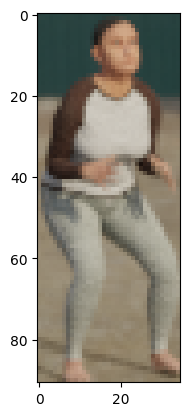

In [113]:
crop_image("00000003.rgb.png", [237, 96, 35, 91], 1)

from PIL import Image


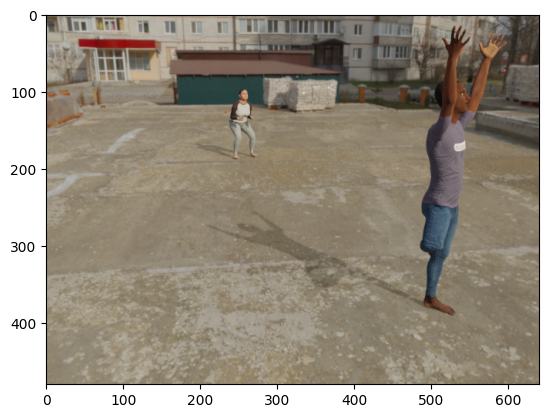

In [61]:
image = plt.imread('/Users/abou48862/code/kvkirya/pt-ai/raw_data/00/00000003.rgb.png')


In [41]:
box1 = [237, 96, 35, 91]
x0 = box1[0]
y0 = box1[1]
width = box1[2]
height = box1[3]

In [42]:
image[y0:y0+height , x0:x0+width, :]

array([[[0.16470589, 0.25490198, 0.24313726, 1.        ],
        [0.16470589, 0.2627451 , 0.2509804 , 1.        ],
        [0.16470589, 0.26666668, 0.25490198, 1.        ],
        ...,
        [0.16078432, 0.25882354, 0.24705882, 1.        ],
        [0.15686275, 0.25490198, 0.24313726, 1.        ],
        [0.16078432, 0.25882354, 0.2509804 , 1.        ]],

       [[0.1764706 , 0.2627451 , 0.2509804 , 1.        ],
        [0.16862746, 0.26666668, 0.2509804 , 1.        ],
        [0.16470589, 0.2627451 , 0.2509804 , 1.        ],
        ...,
        [0.16078432, 0.25882354, 0.24705882, 1.        ],
        [0.15686275, 0.2509804 , 0.23921569, 1.        ],
        [0.16078432, 0.25882354, 0.24705882, 1.        ]],

       [[0.16078432, 0.25882354, 0.24313726, 1.        ],
        [0.15686275, 0.25882354, 0.24705882, 1.        ],
        [0.16078432, 0.2627451 , 0.2509804 , 1.        ],
        ...,
        [0.15686275, 0.25490198, 0.24705882, 1.        ],
        [0.14901961, 0.247058

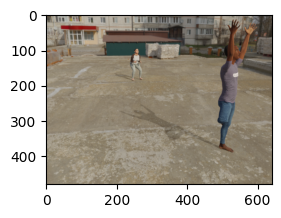

In [43]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(plt.imread('/Users/abou48862/code/kvkirya/pt-ai/raw_data/00/00000003.rgb.png'))

In [44]:
ax1 = fig.add_subplot(222)
ax1.imshow(image[y0:y0+height , x0:x0+width, :])

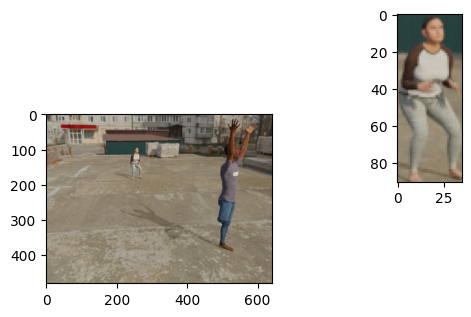

In [45]:
fig

Applying function to all images

In [133]:
extension_mask = df_complete.file_name.str.endswith(".rgb.png")

df_complete[extension_mask]

,id,file_name,pose_variation,pose_category,exercise_category,bbox,camera_rotation_deg,bbox_pascal,index
0,1,00000001.rgb.png,situp,situp,[HIIT],"[439.01, 187.01, 56.98000000000002, 53.9800000...",78.472965,"[439.01, 187.01, 495.99, 240.99]",1
1,1,00000001.rgb.png,situp,situp,[HIIT],"[142.01, 185.01, 51.98000000000002, 54.9800000...",78.472965,"[142.01, 185.01, 193.99, 239.99]",2
2,1,00000001.rgb.png,tree_right,tree,[Yoga],"[302.01, 97.01, 38.98000000000002, 161.9800000...",78.472965,"[302.01, 97.01, 340.99, 258.99]",3
3,2,00000002.rgb.png,sideplank_right,sideplank,"[Yoga, HIIT]","[477.01, 113.01, 110.98000000000002, 91.98]",67.888454,"[477.01, 113.01, 587.99, 204.99]",4
4,2,00000002.rgb.png,curls_right,curls,[HIIT],"[506.01, 99.01, 97.98000000000002, 239.9800000...",67.888454,"[506.01, 99.01, 603.99, 338.99]",5
...,...,...,...,...,...,...,...,...,...
167939,59577,00059577.rgb.png,hipbridge,hipbridge,"[Yoga, HIIT]","[398.01, 229.01, 126.98000000000002, 67.980000...",70.161267,"[398.01, 229.01, 524.99, 296.99]",167940
167940,59578,00059578.rgb.png,plank,plank,"[Yoga, HIIT]","[249.01, 222.01, 245.98000000000002, 132.98000...",78.559729,"[249.01, 222.01, 494.99, 354.99]",167941
167941,59578,00059578.rgb.png,legraise,legraise,[HIIT],"[290.01, 137.01, 71.98000000000002, 73.9800000...",78.559729,"[290.01, 137.01, 361.99, 210.99]",167942
167942,59578,00059578.rgb.png,hipbridge,hipbridge,"[Yoga, HIIT]","[297.01, 201.01, 106.98000000000002, 48.980000...",78.559729,"[297.01, 201.01, 403.99, 249.99]",167943


In [ ]:
new_cropped_names_list = []
for index, row in df_complete.iterrows():
    bbox_used = row["bbox"]
    file_name_used = row["file_name"]
    index_used = row["index"]
    print(row["bbox"])
    #crop_image(file_name_used, bbox_used, index_used)
    new_cropped_names_list.append(crop_image(file_name_used, bbox_used, index_used))
    

[439.01, 187.01, 56.98000000000002, 53.98000000000002]
[142.01, 185.01, 51.98000000000002, 54.98000000000002]
[302.01, 97.01, 38.98000000000002, 161.98000000000002]
[477.01, 113.01, 110.98000000000002, 91.98]
[506.01, 99.01, 97.98000000000002, 239.98000000000002]
[56.01, 118.01, 44.98, 67.98]
[97.01, 244.01, 129.98000000000002, 129.98000000000002]
[237.01, 96.01, 34.98000000000002, 90.98]
[484.01, 14.01, 112.98000000000002, 376.98]
[436.01, 144.01, 96.98000000000002, 62.98000000000002]
[0, 246.01, 146.98000000000002, 71.98000000000002]
[0, 48.01, 107.97999999999999, 299.98]
[408.01, 161.01, 87.98000000000002, 111.98000000000002]
[324.01, 122.01, 59.98000000000002, 70.98]
[74.01, 176.01, 75.98, 98.98000000000002]
[440.01, 163.01, 87.98000000000002, 63.98000000000002]
[323.01, 180.01, 61.98000000000002, 50.98000000000002]
[251.01, 202.01, 68.98000000000002, 69.98000000000002]
[300.01, 160.01, 32.98000000000002, 80.98000000000002]
[460.01, 169.01, 99.98000000000002, 45.98000000000002]
[33

/var/folders/zd/7pg6b__d3n57x_0cfph3xpzw0000gn/T/ipykernel_92910/472385985.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


[102.01, 109.01, 58.980000000000004, 220.98000000000002]
[152.01, 158.01, 76.98000000000002, 58.98000000000002]
[251.01, 35.01, 26.980000000000018, 121.98000000000002]
[431.01, 245.01, 202.98000000000002, 234.98000000000002]
[127.00999999999999, 254.01, 166.98000000000002, 137.98000000000002]
[332.01, 86.01, 69.98000000000002, 139.98000000000002]
[480.01, 175.01, 32.98000000000002, 53.98000000000002]
[77.01, 141.01, 103.98, 105.98000000000002]
[239.01, 182.01, 85.98000000000002, 72.98000000000002]
[346.01, 199.01, 120.98000000000002, 51.98000000000002]
[164.01, 186.01, 129.98000000000002, 57.98000000000002]
[288.01, 66.01, 65.98000000000002, 180.98000000000002]
[213.01, 98.01, 202.98000000000002, 233.98000000000002]
[326.01, 223.01, 281.98, 219.98000000000002]
[194.01, 86.01, 80.98000000000002, 94.98]
[355.01, 50.01, 29.980000000000018, 102.98000000000002]
[151.01, 42.01, 87.98000000000002, 210.98000000000002]
[326.01, 147.01, 87.98000000000002, 166.98000000000002]
[535.01, 72.01, 46.9

[293.01, 103.01, 56.98000000000002, 87.98]
[207.01, 82.01, 235.98000000000002, 167.98000000000002]
[436.01, 146.01, 77.98000000000002, 135.98000000000002]
[123.01, 183.01, 68.98, 69.98000000000002]
[304.01, 125.01, 50.98000000000002, 95.98]
[401.01, 191.01, 100.98000000000002, 68.98000000000002]
[172.01, 176.01, 92.98000000000002, 72.98000000000002]
[67.01, 216.01, 166.98000000000002, 124.98000000000002]
[393.01, 156.01, 48.98000000000002, 39.98000000000002]
[384.01, 144.01, 79.98000000000002, 183.98000000000002]
[204.01, 76.01, 87.98000000000002, 101.98]
[104.01, 163.01, 74.98, 98.98000000000002]
[445.01, 116.01, 106.98000000000002, 57.980000000000004]
[151.01, 275.01, 67.98000000000002, 204.98000000000002]
[271.01, 214.01, 79.98000000000002, 114.98000000000002]
[490.01, 169.01, 45.98000000000002, 49.98000000000002]
[180.01, 134.01, 97.98000000000002, 87.98000000000002]
[118.01, 195.01, 149.98000000000002, 64.98000000000002]
[151.01, 154.01, 67.98000000000002, 107.98000000000002]
[226

[378.01, 131.01, 46.98000000000002, 92.98000000000002]
[177.01, 182.01, 89.98000000000002, 40.98000000000002]
[263.01, 157.01, 93.98000000000002, 164.98000000000002]
[395.01, 176.01, 78.98000000000002, 50.98000000000002]
[113.01, 180.01, 51.980000000000004, 77.98000000000002]
[316.01, 199.01, 126.98000000000002, 64.98000000000002]
[0, 208.01, 129.98000000000002, 86.98000000000002]
[209.01, 109.01, 59.98000000000002, 55.980000000000004]
[510.01, 124.01, 49.98000000000002, 64.98]
[211.01, 207.01, 79.98000000000002, 99.98000000000002]
[510.01, 331.01, 129.98000000000002, 148.98000000000002]
[240.01, 64.01, 82.98000000000002, 183.98000000000002]
[363.01, 327.01, 276.98, 137.98000000000002]
[244.01, 28.01, 59.98000000000002, 109.98]
[277.01, 138.01, 92.98000000000002, 129.98000000000002]
[413.01, 148.01, 63.98000000000002, 77.98000000000002]
[173.01, 149.01, 67.98000000000002, 58.98000000000002]
[248.01, 164.01, 183.98000000000002, 204.98000000000002]
[277.01, 104.01, 115.98000000000002, 79

[103.01, 189.01, 167.98000000000002, 85.98000000000002]
[440.01, 181.01, 32.98000000000002, 64.98000000000002]
[253.01, 156.01, 90.98000000000002, 64.98000000000002]
[393.01, 171.01, 52.98000000000002, 79.98000000000002]
[69.01, 125.01, 70.98, 152.98000000000002]
[366.01, 179.01, 84.98000000000002, 21.980000000000018]
[272.01, 290.01, 289.98, 188.98000000000002]
[226.01, 126.01, 35.98000000000002, 84.98]
[435.01, 114.01, 58.98000000000002, 56.980000000000004]
[328.01, 70.01, 86.98000000000002, 196.98000000000002]
[181.01, 121.01, 90.98000000000002, 48.980000000000004]
[81.01, 139.01, 122.98, 198.98000000000002]
[104.01, 439.01, 122.98, 40.98000000000002]
[210.01, 158.01, 63.98000000000002, 85.98000000000002]
[380.01, 191.01, 30.980000000000018, 58.98000000000002]
[154.01, 216.01, 166.98000000000002, 165.98000000000002]
[294.01, 69.01, 42.98000000000002, 114.98]
[333.01, 59.01, 78.98000000000002, 189.98000000000002]
[477.01, 307.01, 162.98000000000002, 115.98000000000002]
[121.01, 144.0

[355.01, 172.01, 130.98000000000002, 92.98000000000002]
[162.01, 142.01, 148.98000000000002, 296.98]
[227.01, 68.01, 95.98000000000002, 99.98]
[165.01, 132.01, 26.980000000000018, 96.98000000000002]
[390.01, 101.01, 40.98000000000002, 125.98]
[328.01, 231.01, 110.98000000000002, 51.98000000000002]
[156.01, 247.01, 115.98000000000002, 89.98000000000002]
[272.01, 198.01, 90.98000000000002, 34.98000000000002]
[158.01, 118.01, 69.98000000000002, 96.98]
[487.01, 176.01, 89.98000000000002, 69.98000000000002]
[136.01, 159.01, 199.98000000000002, 153.98000000000002]
[349.01, 64.01, 32.98000000000002, 138.98000000000002]
[399.01, 125.01, 146.98000000000002, 309.98]
[179.01, 109.01, 33.98000000000002, 103.98]
[365.01, 109.01, 24.980000000000018, 93.98]
[252.01, 81.01, 33.98000000000002, 122.98]
[378.01, 147.01, 49.98000000000002, 42.98000000000002]
[54.01, 221.01, 74.98000000000002, 137.98000000000002]
[421.01, 108.01, 56.98000000000002, 219.98000000000002]
[63.010000000000005, 210.01, 94.98, 72

[0, 390.01, 190.98000000000002, 89.98000000000002]
[440.01, 185.01, 75.98000000000002, 111.98000000000002]
[29.01, 142.01, 136.98000000000002, 65.98000000000002]
[398.01, 136.01, 106.98000000000002, 36.98000000000002]
[300.01, 116.01, 36.98000000000002, 124.98]
[158.01, 186.01, 87.98000000000002, 78.98000000000002]
[387.01, 87.01, 45.98000000000002, 134.98000000000002]
[179.01, 111.01, 82.98000000000002, 66.98]
[104.01, 184.01, 132.98000000000002, 113.98000000000002]
[345.01, 123.01, 102.98000000000002, 297.98]
[498.01, 22.01, 98.98000000000002, 201.98000000000002]
[118.01, 57.01, 39.980000000000004, 136.98000000000002]
[458.01, 66.01, 47.98000000000002, 138.98000000000002]
[341.01, 326.01, 91.98000000000002, 153.98000000000002]
[242.01, 217.01, 139.98000000000002, 71.98000000000002]
[183.01, 56.01, 40.98000000000002, 117.98000000000002]
[269.01, 33.01, 65.98000000000002, 183.98000000000002]
[274.01, 0, 41.98000000000002, 155.98000000000002]
[345.01, 191.01, 198.98000000000002, 288.98]

[440.01, 142.01, 162.98000000000002, 86.98000000000002]
[0, 268.01, 196.98000000000002, 122.98000000000002]
[226.01, 113.01, 96.98000000000002, 60.980000000000004]
[284.01, 139.01, 136.98000000000002, 147.98000000000002]
[134.01, 89.01, 110.98000000000002, 94.98]
[593.01, 98.01, 46.98000000000002, 166.98000000000002]
[143.01, 111.01, 82.98000000000002, 131.98000000000002]
[390.01, 171.01, 93.98000000000002, 263.98]
[276.01, 191.01, 110.98000000000002, 49.98000000000002]
[288.01, 174.01, 108.98000000000002, 146.98000000000002]
[278.01, 97.01, 36.98000000000002, 108.98]
[512.01, 0, 127.98000000000002, 476.98]
[68.01, 129.01, 93.98, 90.98000000000002]
[245.01, 35.01, 69.98000000000002, 236.98000000000002]
[403.01, 133.01, 38.98000000000002, 54.98000000000002]
[107.01, 91.01, 134.98000000000002, 134.98000000000002]
[442.01, 135.01, 104.98000000000002, 257.98]
[306.01, 139.01, 132.98000000000002, 66.98000000000002]
[288.01, 124.01, 63.98000000000002, 170.98000000000002]
[380.01, 131.01, 75.

[257.01, 97.01, 75.98000000000002, 130.98000000000002]
[297.01, 181.01, 47.98000000000002, 64.98000000000002]
[342.01, 189.01, 144.98000000000002, 102.98000000000002]
[206.01, 78.01, 68.98000000000002, 138.98000000000002]
[375.01, 121.01, 68.98000000000002, 132.98000000000002]
[0, 265.01, 204.98000000000002, 214.98000000000002]
[556.01, 175.01, 62.98000000000002, 78.98000000000002]
[150.01, 128.01, 31.980000000000018, 60.98000000000002]
[261.01, 98.01, 39.98000000000002, 132.98000000000002]
[281.01, 82.01, 72.98000000000002, 160.98000000000002]
[304.01, 150.01, 43.98000000000002, 92.98000000000002]
[516.01, 201.01, 89.98000000000002, 40.98000000000002]
[320.01, 187.01, 134.98000000000002, 66.98000000000002]
[134.01, 163.01, 106.98000000000002, 54.98000000000002]
[23.01, 216.01, 140.98000000000002, 68.98000000000002]
[300.01, 156.01, 83.98000000000002, 179.98000000000002]
[0, 130.01, 74.97999999999999, 98.98000000000002]
[321.01, 182.01, 95.98000000000002, 67.98000000000002]
[459.01, 15

[444.01, 153.01, 87.98000000000002, 56.98000000000002]
[81.01, 147.01, 171.98000000000002, 206.98000000000002]
[307.01, 205.01, 60.98000000000002, 83.98000000000002]
[173.01, 150.01, 56.98000000000002, 51.98000000000002]
[253.01, 79.01, 54.98000000000002, 117.98]
[353.01, 110.01, 124.98000000000002, 261.98]
[420.01, 57.01, 61.98000000000002, 105.98000000000002]
[0, 326.01, 122.97999999999999, 62.98000000000002]
[198.01, 163.01, 109.98000000000002, 50.98000000000002]
[273.01, 284.01, 50.98000000000002, 92.98000000000002]
[370.01, 153.01, 72.98000000000002, 66.98000000000002]
[268.01, 99.01, 144.98000000000002, 235.98000000000002]
[267.01, 140.01, 66.98000000000002, 53.98000000000002]
[287.01, 48.01, 67.98000000000002, 195.98000000000002]
[170.01, 155.01, 127.98000000000002, 82.98000000000002]
[0, 292.01, 82.99, 41.98000000000002]
[462.01, 100.01, 98.98000000000002, 128.98000000000002]
[364.01, 48.01, 31.980000000000018, 130.98000000000002]
[348.01, 222.01, 149.98000000000002, 98.9800000

[146.01, 159.01, 49.98000000000002, 77.98000000000002]
[325.01, 66.01, 27.980000000000018, 99.98]
[344.01, 241.01, 253.98000000000002, 229.98000000000002]
[247.01, 125.01, 212.98000000000002, 237.98000000000002]
[432.01, 206.01, 136.98000000000002, 69.98000000000002]
[217.01, 147.01, 107.98000000000002, 84.98000000000002]
[173.01, 103.01, 44.98000000000002, 88.98]
[0, 137.01, 126.97999999999999, 121.98000000000002]
[157.01, 209.01, 125.98000000000002, 162.98000000000002]
[428.01, 80.01, 140.98000000000002, 171.98000000000002]
[399.01, 85.01, 105.98000000000002, 96.98]
[0, 132.01, 174.98000000000002, 152.98000000000002]
[501.01, 74.01, 62.98000000000002, 151.98000000000002]
[230.01, 211.01, 181.98000000000002, 105.98000000000002]
[240.01, 150.01, 100.98000000000002, 56.98000000000002]
[172.01, 55.01, 56.98000000000002, 125.98000000000002]
[381.01, 69.01, 91.98000000000002, 213.98000000000002]
[365.01, 134.01, 46.98000000000002, 52.98000000000002]
[143.01, 111.01, 125.98000000000002, 352

[247.01, 112.01, 50.98000000000002, 96.98]
[192.01, 197.01, 60.98000000000002, 36.98000000000002]
[426.01, 164.01, 23.980000000000018, 102.98000000000002]
[316.01, 125.01, 76.98000000000002, 54.980000000000004]
[194.01, 274.01, 130.98000000000002, 113.98000000000002]
[299.01, 116.01, 39.98000000000002, 123.98]
[443.01, 220.01, 160.98000000000002, 47.98000000000002]
[125.01, 215.01, 134.98000000000002, 51.98000000000002]
[209.01, 181.01, 79.98000000000002, 39.98000000000002]
[507.01, 162.01, 65.98000000000002, 38.98000000000002]
[251.01, 105.01, 69.98000000000002, 351.98]
[178.01, 140.01, 40.98000000000002, 55.98000000000002]
[140.01, 208.01, 108.98000000000002, 90.98000000000002]
[329.01, 187.01, 44.98000000000002, 51.98000000000002]
[196.01, 376.01, 329.99, 103.98000000000002]
[216.01, 99.01, 77.98000000000002, 67.98]
[253.01, 79.01, 99.98000000000002, 191.98000000000002]
[226.01, 0, 57.99000000000001, 138.98000000000002]
[453.01, 415.01, 186.98000000000002, 64.98000000000002]
[169.01

[137.01, 178.01, 76.98000000000002, 36.98000000000002]
[285.01, 197.01, 41.98000000000002, 129.98000000000002]
[441.01, 103.01, 33.98000000000002, 169.98000000000002]
[105.01, 200.01, 108.98, 52.98000000000002]
[127.00999999999999, 109.01, 50.98000000000002, 114.98]
[312.01, 156.01, 86.98000000000002, 204.98000000000002]
[455.01, 66.01, 29.980000000000018, 148.98000000000002]
[142.01, 151.01, 147.98000000000002, 52.98000000000002]
[519.01, 41.01, 47.98000000000002, 191.98000000000002]
[112.01, 254.01, 109.98, 135.98000000000002]
[300.01, 149.01, 54.98000000000002, 93.98000000000002]
[274.01, 192.01, 83.98000000000002, 65.98000000000002]
[224.01, 0, 167.98000000000002, 373.98]
[327.01, 136.01, 31.980000000000018, 49.98000000000002]
[155.01, 117.01, 45.98000000000002, 102.98]
[285.01, 125.01, 69.98000000000002, 84.98]
[479.01, 63.010000000000005, 96.98000000000002, 289.98]
[351.01, 56.01, 73.98000000000002, 198.98000000000002]
[370.01, 60.01, 54.98000000000002, 157.98000000000002]
[323.0

[319.01, 107.01, 58.98000000000002, 110.98]
[282.01, 78.01, 70.98000000000002, 164.98000000000002]
[287.01, 244.01, 235.98000000000002, 136.98000000000002]
[269.01, 156.01, 35.98000000000002, 57.98000000000002]
[108.01, 77.01, 48.980000000000004, 146.98000000000002]
[487.01, 163.01, 88.98000000000002, 92.98000000000002]
[209.01, 193.01, 92.98000000000002, 67.98000000000002]
[507.01, 148.01, 61.98000000000002, 106.98000000000002]
[374.01, 195.01, 76.98000000000002, 32.98000000000002]
[47.01, 183.01, 70.97999999999999, 51.98000000000002]
[247.01, 178.01, 88.98000000000002, 96.98000000000002]
[301.01, 51.01, 29.980000000000018, 126.98000000000002]
[26.01, 186.01, 86.97999999999999, 104.98000000000002]
[485.01, 146.01, 152.98000000000002, 64.98000000000002]
[128.01, 195.01, 74.98000000000002, 284.98]
[303.01, 103.01, 34.98000000000002, 99.98]
[291.01, 102.01, 79.98000000000002, 227.98000000000002]
[191.01, 31.009999999999998, 228.98000000000002, 260.98]
[294.01, 98.01, 36.98000000000002, 8

[209.01, 188.01, 97.98000000000002, 78.98000000000002]
[75.01, 113.01, 40.97999999999999, 116.98]
[223.01, 176.01, 120.98000000000002, 188.98000000000002]
[301.01, 162.01, 103.98000000000002, 73.98000000000002]
[468.01, 152.01, 52.98000000000002, 61.98000000000002]
[367.01, 156.01, 104.98000000000002, 96.98000000000002]
[206.01, 141.01, 45.98000000000002, 98.98000000000002]
[187.01, 86.01, 102.98000000000002, 89.98]
[411.01, 180.01, 223.98000000000002, 228.98000000000002]
[284.01, 154.01, 134.98000000000002, 93.98000000000002]
[30.01, 166.01, 72.97999999999999, 135.98000000000002]
[405.01, 151.01, 114.98000000000002, 68.98000000000002]
[284.01, 131.01, 88.98000000000002, 88.98000000000002]
[413.01, 209.01, 64.98000000000002, 67.98000000000002]
[163.01, 169.01, 57.98000000000002, 80.98000000000002]
[92.01, 193.01, 90.98, 66.98000000000002]
[414.01, 114.01, 97.98000000000002, 120.98]
[302.01, 46.01, 38.98000000000002, 198.98000000000002]
[558.01, 0, 77.98000000000002, 261.98]
[147.01, 38

[398.01, 148.01, 86.98000000000002, 22.980000000000018]
[281.01, 197.01, 80.98000000000002, 48.98000000000002]
[223.01, 9.01, 190.98000000000002, 241.98000000000002]
[218.01, 329.01, 185.98000000000002, 150.98000000000002]
[209.01, 61.01, 35.98000000000002, 119.98000000000002]
[385.01, 36.01, 54.98000000000002, 162.98000000000002]
[293.01, 137.01, 85.98000000000002, 159.98000000000002]
[50.01, 244.01, 339.98, 235.98000000000002]
[303.01, 11.01, 104.98000000000002, 151.98000000000002]
[201.01, 165.01, 63.98000000000002, 49.98000000000002]
[255.01, 222.01, 85.98000000000002, 43.98000000000002]
[80.01, 173.01, 151.98000000000002, 178.98000000000002]
[497.01, 79.01, 72.98000000000002, 138.98000000000002]
[205.01, 129.01, 70.98000000000002, 242.98000000000002]
[308.01, 173.01, 78.98000000000002, 38.98000000000002]
[463.01, 161.01, 143.98000000000002, 131.98000000000002]
[159.01, 152.01, 63.98000000000002, 48.98000000000002]
[285.01, 147.01, 28.980000000000018, 59.98000000000002]
[303.01, 10

[226.01, 147.01, 82.98000000000002, 40.98000000000002]
[345.01, 148.01, 72.98000000000002, 41.98000000000002]
[244.01, 100.01, 91.98000000000002, 122.98]
[148.01, 149.01, 89.98000000000002, 312.98]
[249.01, 154.01, 97.98000000000002, 77.98000000000002]
[589.01, 218.01, 50.98000000000002, 156.98000000000002]
[176.01, 175.01, 74.98000000000002, 32.98000000000002]
[256.01, 202.01, 113.98000000000002, 41.98000000000002]
[174.01, 175.01, 123.98000000000002, 36.98000000000002]
[133.01, 283.01, 96.98000000000002, 98.98000000000002]
[448.01, 116.01, 49.98000000000002, 104.98]
[428.01, 40.01, 87.98000000000002, 163.98000000000002]
[0, 68.01, 102.97999999999999, 252.98000000000002]
[211.01, 156.01, 85.98000000000002, 42.98000000000002]
[379.01, 170.01, 169.98000000000002, 184.98000000000002]
[367.01, 108.01, 122.98000000000002, 101.98]
[89.01, 236.01, 136.98000000000002, 81.98000000000002]
[585.01, 134.01, 54.98000000000002, 157.98000000000002]
[162.01, 142.01, 81.98000000000002, 65.980000000000

[211.01, 28.01, 191.98000000000002, 298.98]
[368.01, 167.01, 113.98000000000002, 72.98000000000002]
[75.01, 115.01, 54.980000000000004, 90.98]
[74.0, 0, 115.99000000000001, 309.98]
[373.01, 96.01, 85.98000000000002, 92.98]
[379.01, 250.01, 260.98, 204.98000000000002]
[227.01, 106.01, 66.98000000000002, 193.98000000000002]
[514.01, 26.01, 81.98000000000002, 158.98000000000002]
[24.01, 263.01, 264.98, 216.98000000000002]
[148.01, 27.01, 53.98000000000002, 165.98000000000002]
[167.01, 255.01, 158.98000000000002, 113.98000000000002]
[411.01, 56.01, 58.98000000000002, 208.98000000000002]
[253.01, 133.01, 64.98000000000002, 52.98000000000002]
[81.01, 166.01, 115.98, 63.98000000000002]
[510.01, 141.01, 81.98000000000002, 149.98000000000002]
[321.01, 134.01, 42.98000000000002, 165.98000000000002]
[240.01, 147.01, 98.98000000000002, 71.98000000000002]
[94.01, 96.01, 137.98000000000002, 219.98000000000002]
[301.01, 117.01, 46.98000000000002, 98.98]
[368.01, 194.01, 87.98000000000002, 57.98000000

[261.01, 143.01, 176.98000000000002, 130.98000000000002]
[187.01, 165.01, 57.98000000000002, 73.98000000000002]
[380.01, 150.01, 96.98000000000002, 58.98000000000002]
[188.01, 251.01, 170.98000000000002, 106.98000000000002]
[393.01, 7.01, 177.98000000000002, 262.98]
[333.01, 100.01, 119.98000000000002, 61.980000000000004]
[0, 328.01, 250.98000000000002, 148.98000000000002]
[213.01, 32.01, 45.98000000000002, 188.98000000000002]
[265.01, 46.01, 99.98000000000002, 208.98000000000002]
[221.01, 132.01, 49.98000000000002, 99.98000000000002]
[0, 157.01, 117.97999999999999, 166.98000000000002]
[486.01, 186.01, 153.98000000000002, 55.98000000000002]
[211.01, 204.01, 65.98000000000002, 43.98000000000002]
[377.01, 174.01, 79.98000000000002, 72.98000000000002]
[222.01, 60.01, 46.98000000000002, 133.98000000000002]
[391.01, 145.01, 65.98000000000002, 59.98000000000002]
[282.01, 109.01, 38.98000000000002, 160.98000000000002]
[219.01, 172.01, 95.98000000000002, 307.98]
[198.01, 179.01, 95.98000000000

[359.01, 168.01, 110.98000000000002, 77.98000000000002]
[206.01, 361.01, 183.98000000000002, 118.98000000000002]
[160.01, 95.01, 33.98000000000002, 102.98]
[427.01, 150.01, 72.98000000000002, 55.98000000000002]
[202.01, 64.01, 25.980000000000018, 144.98000000000002]
[468.01, 207.01, 91.98000000000002, 129.98000000000002]
[171.01, 121.01, 95.98000000000002, 152.98000000000002]
[348.01, 168.01, 73.98000000000002, 58.98000000000002]
[282.01, 0, 80.98000000000002, 256.98]
[255.01, 86.01, 136.98000000000002, 161.98000000000002]
[311.01, 126.01, 83.98000000000002, 73.98]
[196.01, 139.01, 97.98000000000002, 203.98000000000002]
[171.01, 211.01, 189.98000000000002, 173.98000000000002]
[111.01, 42.01, 64.98, 135.98000000000002]
[564.01, 227.01, 75.98000000000002, 83.98000000000002]
[289.01, 97.01, 48.98000000000002, 146.98000000000002]
[267.01, 178.01, 88.98000000000002, 77.98000000000002]
[269.01, 102.01, 151.98000000000002, 144.98000000000002]
[264.01, 186.01, 103.98000000000002, 66.9800000000

[0, 82.01, 87.97999999999999, 208.98000000000002]
[484.01, 183.01, 44.98000000000002, 34.98000000000002]
[389.01, 153.01, 79.98000000000002, 72.98000000000002]
[151.01, 157.01, 74.98000000000002, 129.98000000000002]
[137.01, 161.01, 99.98000000000002, 265.98]
[295.01, 64.01, 79.98000000000002, 167.98000000000002]
[202.01, 147.01, 29.980000000000018, 61.98000000000002]
[416.01, 144.01, 99.98000000000002, 65.98000000000002]
[302.01, 114.01, 36.98000000000002, 129.98000000000002]
[241.01, 202.01, 104.98000000000002, 37.98000000000002]
[176.01, 100.01, 51.98000000000002, 121.98]
[479.01, 246.01, 160.98000000000002, 52.98000000000002]
[255.01, 34.01, 55.98000000000002, 224.98000000000002]
[588.01, 171.01, 49.98000000000002, 82.98000000000002]
[79.01, 182.01, 73.98, 45.98000000000002]
[178.01, 137.01, 60.98000000000002, 185.98000000000002]
[358.01, 191.01, 99.98000000000002, 48.98000000000002]
[266.01, 79.01, 80.98000000000002, 124.98]
[185.01, 164.01, 100.98000000000002, 102.98000000000002]

[303.01, 189.01, 98.98000000000002, 41.98000000000002]
[370.01, 133.01, 4.980000000000018, 13.980000000000018]
[414.01, 187.01, 50.98000000000002, 34.98000000000002]
[364.01, 209.01, 116.98000000000002, 103.98000000000002]
[105.01, 160.01, 39.980000000000004, 61.98000000000002]
[184.01, 142.01, 80.98000000000002, 64.98000000000002]
[103.01, 238.01, 188.98000000000002, 102.98000000000002]
[478.01, 186.01, 60.98000000000002, 46.98000000000002]
[245.01, 131.01, 55.98000000000002, 134.98000000000002]
[496.01, 178.01, 143.98000000000002, 129.98000000000002]
[167.01, 55.01, 44.98000000000002, 154.98000000000002]
[263.01, 56.01, 116.98000000000002, 221.98000000000002]
[274.01, 105.01, 71.98000000000002, 156.98000000000002]
[406.01, 142.01, 83.98000000000002, 108.98000000000002]
[144.01, 179.01, 102.98000000000002, 55.98000000000002]
[357.01, 241.01, 133.98000000000002, 66.98000000000002]
[57.01, 66.01, 91.98000000000002, 186.98000000000002]
[423.01, 131.01, 62.98000000000002, 104.980000000000

[334.01, 93.01, 77.98000000000002, 168.98000000000002]
[163.01, 188.01, 69.98000000000002, 57.98000000000002]
[401.01, 200.01, 93.98000000000002, 47.98000000000002]
[406.01, 80.01, 49.98000000000002, 117.98]
[50.01, 220.01, 142.98000000000002, 110.98000000000002]
[367.01, 135.01, 84.98000000000002, 64.98000000000002]
[0, 208.01, 76.97999999999999, 89.98000000000002]
[395.01, 211.01, 122.98000000000002, 68.98000000000002]
[461.01, 191.01, 129.98000000000002, 77.98000000000002]
[149.01, 57.01, 52.98000000000002, 161.98000000000002]
[252.01, 175.01, 99.98000000000002, 65.98000000000002]
[200.01, 54.01, 44.98000000000002, 143.98000000000002]
[422.01, 84.01, 55.98000000000002, 182.98000000000002]
[17.01, 145.01, 152.98000000000002, 101.98000000000002]
[122.01, 344.01, 227.98000000000002, 135.98000000000002]
[509.01, 82.01, 64.98000000000002, 105.98]
[288.01, 86.01, 69.98000000000002, 159.98000000000002]
[166.01, 135.01, 94.98000000000002, 60.98000000000002]
[607.01, 145.01, 32.9800000000000

[258.01, 162.01, 119.98000000000002, 105.98000000000002]
[371.01, 193.01, 118.98000000000002, 93.98000000000002]
[224.01, 157.01, 88.98000000000002, 63.98000000000002]
[276.01, 176.01, 78.98000000000002, 70.98000000000002]
[170.01, 118.01, 79.98000000000002, 76.98]
[161.01, 145.01, 139.98000000000002, 155.98000000000002]
[462.01, 38.01, 45.98000000000002, 140.98000000000002]
[222.01, 317.01, 118.98000000000002, 162.98000000000002]
[143.01, 187.01, 85.98000000000002, 43.98000000000002]
[479.01, 99.01, 100.98000000000002, 131.98000000000002]
[195.01, 144.01, 72.98000000000002, 140.98000000000002]
[403.01, 132.01, 155.98000000000002, 205.98000000000002]
[204.01, 45.01, 64.98000000000002, 153.98000000000002]
[153.01, 131.01, 55.98000000000002, 106.98000000000002]
[412.01, 95.01, 88.98000000000002, 157.98000000000002]
[272.01, 195.01, 93.98000000000002, 60.98000000000002]
[283.01, 121.01, 38.98000000000002, 75.98]
[141.01, 186.01, 116.98000000000002, 80.98000000000002]
[414.01, 153.01, 69.9

[421.01, 69.01, 63.98000000000002, 208.98000000000002]
[352.01, 139.01, 74.98000000000002, 265.98]
[241.01, 127.00999999999999, 101.98000000000002, 49.98000000000002]
[176.01, 151.01, 166.98000000000002, 111.98000000000002]
[362.01, 173.01, 276.99, 247.98000000000002]
[0, 194.01, 184.98000000000002, 285.98]
[224.01, 78.01, 72.98000000000002, 52.980000000000004]
[431.01, 8.01, 25.980000000000018, 173.98000000000002]
[46.01, 194.01, 104.98000000000002, 71.98000000000002]
[336.01, 279.01, 181.98000000000002, 105.98000000000002]
[390.01, 146.01, 64.98000000000002, 36.98000000000002]
[316.01, 144.01, 91.98000000000002, 62.98000000000002]
[56.01, 88.01, 105.98000000000002, 189.98000000000002]
[362.01, 219.01, 179.98000000000002, 50.98000000000002]
[202.01, 48.01, 58.98000000000002, 151.98000000000002]
[141.01, 214.01, 99.98000000000002, 65.98000000000002]
[530.01, 242.01, 109.98000000000002, 151.98000000000002]
[368.01, 66.01, 56.98000000000002, 144.98000000000002]
[240.01, 132.01, 109.98000

[318.01, 69.01, 53.98000000000002, 180.98000000000002]
[214.01, 186.01, 70.98000000000002, 40.98000000000002]
[101.01, 140.01, 75.98, 124.98000000000002]
[232.01, 212.01, 105.98000000000002, 95.98000000000002]
[338.01, 108.01, 51.98000000000002, 97.98]
[232.01, 326.01, 360.98, 153.98000000000002]
[244.01, 116.01, 28.980000000000018, 130.98000000000002]
[173.01, 160.01, 81.98000000000002, 26.980000000000018]
[435.01, 111.01, 102.98000000000002, 123.98]
[296.01, 193.01, 57.98000000000002, 103.98000000000002]
[471.01, 304.01, 112.98000000000002, 175.98000000000002]
[217.01, 50.01, 29.980000000000018, 102.98000000000002]
[80.01, 45.01, 78.98, 293.98]
[576.01, 144.01, 63.98000000000002, 152.98000000000002]
[309.01, 83.01, 68.98000000000002, 179.98000000000002]
[204.01, 41.01, 30.980000000000018, 132.98000000000002]
[21.01, 182.01, 169.98000000000002, 144.98000000000002]
[586.01, 194.01, 53.98000000000002, 45.98000000000002]
[132.01, 138.01, 85.98000000000002, 68.98000000000002]
[355.01, 215

[463.01, 192.01, 132.98000000000002, 85.98000000000002]
[406.01, 159.01, 36.98000000000002, 67.98000000000002]
[223.01, 115.01, 43.98000000000002, 148.98000000000002]
[92.01, 165.01, 72.98, 53.98000000000002]
[253.01, 168.01, 104.98000000000002, 80.98000000000002]
[266.01, 108.01, 112.98000000000002, 112.98]
[417.01, 166.01, 148.98000000000002, 70.98000000000002]
[4.01, 218.01, 130.98000000000002, 100.98000000000002]
[397.01, 117.01, 27.980000000000018, 122.98]
[195.01, 176.01, 104.98000000000002, 67.98000000000002]
[254.01, 201.01, 165.98000000000002, 156.98000000000002]
[248.01, 107.01, 115.98000000000002, 95.98]
[337.01, 155.01, 99.98000000000002, 195.98000000000002]
[251.01, 114.01, 37.98000000000002, 75.98]
[372.01, 96.01, 97.98000000000002, 134.98000000000002]
[155.01, 201.01, 92.98000000000002, 69.98000000000002]
[321.01, 120.01, 92.98000000000002, 95.98]
[605.01, 115.01, 33.99000000000001, 111.98]
[95.01, 143.01, 93.98, 255.98000000000002]
[66.01, 137.01, 146.98000000000002, 11

[31.009999999999998, 195.01, 165.98000000000002, 172.98000000000002]
[289.01, 163.01, 107.98000000000002, 83.98000000000002]
[311.01, 178.01, 112.98000000000002, 30.980000000000018]
[54.01, 177.01, 144.98000000000002, 61.98000000000002]
[488.01, 164.01, 50.98000000000002, 179.98000000000002]
[384.01, 118.01, 227.98000000000002, 169.98000000000002]
[416.01, 152.01, 35.98000000000002, 71.98000000000002]
[218.01, 151.01, 59.98000000000002, 43.98000000000002]
[84.01, 104.01, 96.98, 124.98]
[326.01, 156.01, 255.98000000000002, 305.98]
[281.01, 179.01, 83.98000000000002, 111.98000000000002]
[474.01, 45.01, 44.98000000000002, 127.98000000000002]
[3.01, 124.01, 146.98000000000002, 181.98000000000002]
[128.01, 309.01, 251.98000000000002, 170.98000000000002]
[265.01, 130.01, 50.98000000000002, 71.98000000000002]
[306.01, 27.01, 119.98000000000002, 310.98]
[212.01, 111.01, 121.98000000000002, 88.98]
[235.01, 133.01, 59.98000000000002, 83.98000000000002]
[406.01, 85.01, 67.98000000000002, 200.9800

[210.01, 180.01, 94.98000000000002, 80.98000000000002]
[131.01, 120.01, 68.98000000000002, 86.98]
[137.01, 139.01, 73.98000000000002, 153.98000000000002]
[571.01, 129.01, 45.98000000000002, 108.98000000000002]
[256.01, 229.01, 85.98000000000002, 106.98000000000002]
[285.01, 160.01, 77.98000000000002, 35.98000000000002]
[510.01, 40.01, 86.98000000000002, 219.98000000000002]
[306.01, 259.01, 291.98, 212.98000000000002]
[179.01, 142.01, 135.98000000000002, 105.98000000000002]
[189.01, 130.01, 72.98000000000002, 41.98000000000002]
[288.01, 127.00999999999999, 53.98000000000002, 117.98000000000002]
[299.01, 196.01, 37.98000000000002, 51.98000000000002]
[292.01, 192.01, 49.98000000000002, 58.98000000000002]
[352.01, 113.01, 201.98000000000002, 144.98000000000002]
[3.01, 181.01, 177.98000000000002, 186.98000000000002]
[339.01, 139.01, 66.98000000000002, 54.98000000000002]
[499.01, 296.01, 140.98000000000002, 123.98000000000002]
[327.01, 150.01, 134.98000000000002, 81.98000000000002]
[202.01, 

[275.01, 175.01, 95.98000000000002, 37.98000000000002]
[433.01, 182.01, 82.98000000000002, 92.98000000000002]
[129.01, 79.01, 105.98000000000002, 144.98000000000002]
[249.01, 183.01, 89.98000000000002, 90.98000000000002]
[390.01, 277.01, 185.98000000000002, 128.98000000000002]
[193.01, 164.01, 46.98000000000002, 44.98000000000002]
[343.01, 118.01, 116.98000000000002, 98.98]
[397.01, 89.01, 93.98000000000002, 128.98000000000002]
[421.01, 263.01, 166.98000000000002, 83.98000000000002]
[49.01, 110.01, 120.98000000000002, 106.98]
[256.01, 161.01, 102.98000000000002, 74.98000000000002]
[0, 220.01, 133.98000000000002, 101.98000000000002]
[467.01, 153.01, 65.98000000000002, 65.98000000000002]
[361.01, 121.01, 56.98000000000002, 236.98000000000002]
[250.01, 85.01, 53.98000000000002, 105.98]
[152.01, 90.01, 103.98000000000002, 49.980000000000004]
[2.01, 221.01, 180.98000000000002, 123.98000000000002]
[588.01, 159.01, 51.98000000000002, 113.98000000000002]
[270.01, 123.01, 150.98000000000002, 80

[104.01, 113.01, 52.980000000000004, 93.98]
[38.01, 313.01, 196.98000000000002, 134.98000000000002]
[371.01, 91.01, 55.98000000000002, 121.98]
[519.01, 205.01, 94.98000000000002, 47.98000000000002]
[191.01, 154.01, 69.98000000000002, 93.98000000000002]
[376.01, 92.01, 84.98000000000002, 83.98]
[121.01, 319.01, 209.98000000000002, 160.98000000000002]
[263.01, 184.01, 104.98000000000002, 52.98000000000002]
[451.01, 154.01, 141.98000000000002, 128.98000000000002]
[174.01, 187.01, 48.98000000000002, 36.98000000000002]
[61.01, 187.01, 150.98000000000002, 94.98000000000002]
[411.01, 67.01, 59.98000000000002, 127.98]
[344.01, 311.01, 260.98, 135.98000000000002]
[231.01, 132.01, 39.98000000000002, 73.98000000000002]
[304.01, 133.01, 32.98000000000002, 109.98000000000002]
[345.01, 147.01, 57.98000000000002, 92.98000000000002]
[176.01, 136.01, 41.98000000000002, 88.98000000000002]
[498.01, 102.01, 61.98000000000002, 156.98000000000002]
[160.01, 149.01, 101.98000000000002, 104.98000000000002]
[91

[0, 174.01, 300.98, 305.98]
[141.01, 86.01, 27.980000000000018, 136.98000000000002]
[509.01, 60.01, 87.98000000000002, 208.98000000000002]
[0, 299.01, 66.97999999999999, 74.98000000000002]
[238.01, 247.01, 163.98000000000002, 86.98000000000002]
[223.01, 115.01, 95.98000000000002, 102.98]
[485.01, 81.01, 44.98000000000002, 103.98]
[273.01, 151.01, 91.98000000000002, 93.98000000000002]
[75.01, 126.01, 96.98, 92.98]
[265.01, 99.01, 59.98000000000002, 48.980000000000004]
[327.01, 198.01, 86.98000000000002, 92.98000000000002]
[580.01, 108.01, 50.98000000000002, 172.98000000000002]
[162.01, 194.01, 193.98000000000002, 285.98]
[249.01, 139.01, 66.98000000000002, 73.98000000000002]
[488.01, 114.01, 52.98000000000002, 166.98000000000002]
[105.01, 193.01, 126.98, 96.98000000000002]
[357.01, 178.01, 81.98000000000002, 60.98000000000002]
[205.01, 173.01, 59.98000000000002, 93.98000000000002]
[55.01, 94.01, 144.98000000000002, 250.98000000000002]
[232.01, 199.01, 141.98000000000002, 42.980000000000

[154.01, 226.01, 50.98000000000002, 101.98000000000002]
[486.01, 211.01, 88.98000000000002, 250.98000000000002]
[95.01, 65.01, 57.980000000000004, 163.98000000000002]
[328.01, 81.01, 25.980000000000018, 98.98]
[327.01, 113.01, 77.98000000000002, 143.98000000000002]
[151.01, 128.01, 160.98000000000002, 139.98000000000002]
[424.01, 139.01, 74.98000000000002, 135.98000000000002]
[0, 128.01, 74.97999999999999, 105.98000000000002]
[480.01, 143.01, 70.98000000000002, 66.98000000000002]
[274.01, 199.01, 80.98000000000002, 53.98000000000002]
[256.01, 190.01, 121.98000000000002, 54.98000000000002]
[216.01, 170.01, 40.98000000000002, 46.98000000000002]
[421.01, 108.01, 61.98000000000002, 190.98000000000002]
[316.01, 239.01, 192.98000000000002, 118.98000000000002]
[256.01, 43.01, 31.980000000000018, 159.98000000000002]
[170.01, 165.01, 91.98000000000002, 198.98000000000002]
[327.01, 139.01, 90.98000000000002, 53.98000000000002]
[153.01, 211.01, 89.98000000000002, 40.98000000000002]
[293.01, 135.0

[62.01, 187.01, 166.98000000000002, 255.98000000000002]
[95.01, 134.01, 99.98, 78.98000000000002]
[355.01, 43.01, 54.98000000000002, 144.98000000000002]
[340.01, 332.01, 283.98, 147.98000000000002]
[337.01, 107.01, 89.98000000000002, 138.98000000000002]
[266.01, 130.01, 23.980000000000018, 93.98000000000002]
[297.01, 238.01, 136.98000000000002, 40.98000000000002]
[243.01, 99.01, 83.98000000000002, 112.98]
[285.01, 207.01, 155.98000000000002, 123.98000000000002]
[47.01, 160.01, 114.98000000000002, 106.98000000000002]
[422.01, 354.01, 153.98000000000002, 125.98000000000002]
[100.01, 297.01, 181.98000000000002, 96.98000000000002]
[266.01, 105.01, 81.98000000000002, 73.98]
[418.01, 92.01, 84.98000000000002, 81.98]
[456.01, 138.01, 67.98000000000002, 51.98000000000002]
[177.01, 141.01, 91.98000000000002, 174.98000000000002]
[270.01, 143.01, 91.98000000000002, 60.98000000000002]
[23.01, 60.01, 75.97999999999999, 169.98000000000002]
[445.01, 204.01, 77.98000000000002, 275.98]
[304.01, 118.01,

[91.01, 83.01, 141.98000000000002, 95.98]
[109.01, 199.01, 187.98000000000002, 243.98000000000002]
[470.01, 43.01, 169.98000000000002, 203.98000000000002]
[199.01, 115.01, 35.98000000000002, 62.980000000000004]
[238.01, 44.01, 41.98000000000002, 244.98000000000002]
[335.01, 110.01, 38.98000000000002, 104.98]
[228.01, 203.01, 139.98000000000002, 83.98000000000002]
[310.01, 107.01, 62.98000000000002, 119.98]
[491.01, 246.01, 75.98000000000002, 123.98000000000002]
[340.01, 91.01, 81.98000000000002, 110.98]
[92.01, 94.01, 126.98, 104.98]
[209.01, 25.01, 105.98000000000002, 251.98000000000002]
[197.01, 0, 172.98000000000002, 366.98]
[310.01, 133.01, 62.98000000000002, 59.98000000000002]
[278.01, 34.01, 94.98000000000002, 256.98]
[341.01, 177.01, 71.98000000000002, 35.98000000000002]
[139.01, 74.01, 54.98000000000002, 135.98000000000002]
[439.01, 260.01, 150.98000000000002, 219.98000000000002]
[11.01, 168.01, 143.98000000000002, 117.98000000000002]
[275.01, 225.01, 104.98000000000002, 78.980

[94.01, 147.01, 171.98000000000002, 138.98000000000002]
[349.01, 147.01, 87.98000000000002, 61.98000000000002]
[217.01, 117.01, 45.98000000000002, 78.98]
[462.01, 238.01, 142.98000000000002, 181.98000000000002]
[478.01, 129.01, 63.98000000000002, 59.98000000000002]
[35.01, 210.01, 168.98000000000002, 49.98000000000002]
[444.01, 374.01, 194.99, 105.98000000000002]
[177.01, 111.01, 74.98000000000002, 62.980000000000004]
[177.01, 98.01, 90.98000000000002, 251.98000000000002]
[205.01, 56.01, 40.98000000000002, 135.98000000000002]
[449.01, 179.01, 88.98000000000002, 43.98000000000002]
[87.01, 264.01, 170.98000000000002, 215.98000000000002]
[442.01, 170.01, 99.98000000000002, 80.98000000000002]
[378.01, 161.01, 92.98000000000002, 43.98000000000002]
[0, 202.01, 90.97999999999999, 71.98000000000002]
[251.01, 126.01, 98.98000000000002, 92.98]
[159.01, 216.01, 149.98000000000002, 156.98000000000002]
[241.01, 132.01, 64.98000000000002, 56.98000000000002]
[361.01, 260.01, 216.98000000000002, 176.9

[125.01, 179.01, 78.98, 33.98000000000002]
[450.01, 105.01, 68.98000000000002, 103.98]
[145.01, 170.01, 123.98000000000002, 280.98]
[125.01, 147.01, 53.980000000000004, 58.98000000000002]
[354.01, 172.01, 132.98000000000002, 99.98000000000002]
[387.01, 230.01, 75.98000000000002, 145.98000000000002]
[207.01, 86.01, 118.98000000000002, 107.98]
[130.01, 33.01, 97.98000000000002, 255.98000000000002]
[346.01, 145.01, 134.98000000000002, 73.98000000000002]
[237.01, 83.01, 113.98000000000002, 75.98]
[256.01, 34.01, 54.98000000000002, 264.98]
[391.01, 101.01, 133.98000000000002, 104.98]
[29.01, 58.01, 198.98000000000002, 405.98]
[303.01, 181.01, 30.980000000000018, 64.98000000000002]
[382.01, 26.01, 39.98000000000002, 140.98000000000002]
[434.01, 259.01, 164.98000000000002, 137.98000000000002]
[0, 108.01, 59.980000000000004, 214.98000000000002]
[372.01, 147.01, 71.98000000000002, 49.98000000000002]
[0, 212.01, 92.97999999999999, 126.98000000000002]
[420.01, 180.01, 60.98000000000002, 75.980000

[91.01, 168.01, 81.98, 55.98000000000002]
[201.01, 171.01, 57.98000000000002, 90.98000000000002]
[199.01, 116.01, 67.98000000000002, 96.98]
[299.01, 236.01, 186.98000000000002, 126.98000000000002]
[93.01, 94.01, 76.98, 205.98000000000002]
[378.01, 128.01, 79.98000000000002, 66.98000000000002]
[468.01, 98.01, 42.98000000000002, 134.98000000000002]
[77.01, 119.01, 62.980000000000004, 135.98000000000002]
[260.01, 184.01, 112.98000000000002, 65.98000000000002]
[311.01, 0, 99.98000000000002, 202.98000000000002]
[154.01, 230.01, 200.98000000000002, 119.98000000000002]
[419.01, 178.01, 72.98000000000002, 34.98000000000002]
[115.01, 119.01, 48.980000000000004, 98.98]
[53.01, 106.01, 137.98000000000002, 228.98000000000002]
[394.01, 180.01, 143.98000000000002, 87.98000000000002]
[283.01, 159.01, 130.98000000000002, 87.98000000000002]
[267.01, 136.01, 51.98000000000002, 35.98000000000002]
[474.01, 233.01, 165.98000000000002, 90.98000000000002]
[252.01, 143.01, 87.98000000000002, 336.98]
[79.01, 1

[88.01, 41.01, 62.980000000000004, 214.98000000000002]
[449.01, 120.01, 99.98000000000002, 122.98]
[402.01, 244.01, 237.98000000000002, 137.98000000000002]
[225.01, 9.01, 47.98000000000002, 178.98000000000002]
[435.01, 100.01, 44.98000000000002, 140.98000000000002]
[111.01, 181.01, 133.98000000000002, 63.98000000000002]
[285.01, 207.01, 67.98000000000002, 36.98000000000002]
[437.01, 162.01, 74.98000000000002, 62.98000000000002]
[257.01, 319.01, 207.98000000000002, 151.98000000000002]
[112.01, 100.01, 115.98, 103.98]
[245.01, 68.01, 64.98000000000002, 158.98000000000002]
[357.01, 112.01, 37.98000000000002, 149.98000000000002]
[420.01, 162.01, 130.98000000000002, 164.98000000000002]
[187.01, 146.01, 67.98000000000002, 55.98000000000002]
[248.01, 181.01, 95.98000000000002, 86.98000000000002]
[379.01, 111.01, 47.98000000000002, 132.98000000000002]
[217.01, 177.01, 47.98000000000002, 67.98000000000002]
[276.01, 176.01, 64.98000000000002, 64.98000000000002]
[79.01, 148.01, 88.98, 79.98000000

[296.01, 82.01, 74.98000000000002, 107.98]
[90.01, 132.01, 84.98, 163.98000000000002]
[51.01, 148.01, 121.98000000000002, 70.98000000000002]
[112.01, 135.01, 169.98000000000002, 147.98000000000002]
[280.01, 69.01, 45.98000000000002, 142.98000000000002]
[334.01, 195.01, 236.98000000000002, 284.98]
[492.01, 127.00999999999999, 90.98000000000002, 66.98000000000002]
[279.01, 128.01, 77.98000000000002, 126.98000000000002]
[132.01, 155.01, 91.98000000000002, 50.98000000000002]
[191.01, 317.01, 221.98000000000002, 162.98000000000002]
[144.01, 177.01, 104.98000000000002, 74.98000000000002]
[512.01, 155.01, 41.98000000000002, 56.98000000000002]
[308.01, 143.01, 33.98000000000002, 108.98000000000002]
[257.01, 167.01, 112.98000000000002, 75.98000000000002]
[434.01, 257.01, 169.98000000000002, 102.98000000000002]
[373.01, 79.01, 64.98000000000002, 149.98000000000002]
[203.01, 159.01, 119.98000000000002, 41.98000000000002]
[138.01, 196.01, 90.98000000000002, 59.98000000000002]
[353.01, 368.01, 286.

[88.01, 165.01, 178.98000000000002, 191.98000000000002]
[417.01, 117.01, 102.98000000000002, 146.98000000000002]
[305.01, 161.01, 42.98000000000002, 84.98000000000002]
[286.01, 63.010000000000005, 56.98000000000002, 125.98]
[228.01, 144.01, 270.98, 220.98000000000002]
[229.01, 132.01, 112.98000000000002, 32.98000000000002]
[226.01, 307.01, 266.98, 161.98000000000002]
[81.01, 273.01, 210.98000000000002, 178.98000000000002]
[537.01, 289.01, 102.98000000000002, 190.98000000000002]
[445.01, 33.01, 78.98000000000002, 217.98000000000002]
[157.01, 0, 46.98000000000002, 123.97999999999999]
[255.01, 169.01, 40.98000000000002, 39.98000000000002]
[397.01, 76.01, 55.98000000000002, 259.98]
[281.01, 194.01, 59.98000000000002, 53.98000000000002]
[272.01, 103.01, 174.98000000000002, 128.98000000000002]
[130.01, 70.01, 61.98000000000002, 121.98]
[496.01, 170.01, 65.98000000000002, 248.98000000000002]
[294.01, 145.01, 57.98000000000002, 101.98000000000002]
[132.01, 100.01, 58.98000000000002, 135.980000

[153.01, 113.01, 142.98000000000002, 107.98]
[447.01, 61.01, 53.98000000000002, 212.98000000000002]
[298.01, 91.01, 41.98000000000002, 147.98000000000002]
[287.01, 190.01, 64.98000000000002, 62.98000000000002]
[236.01, 152.01, 64.98000000000002, 39.98000000000002]
[444.01, 82.01, 63.98000000000002, 257.98]
[254.01, 161.01, 64.98000000000002, 106.98000000000002]
[286.01, 156.01, 69.98000000000002, 85.98000000000002]
[67.01, 155.01, 97.98, 62.98000000000002]
[418.01, 120.01, 48.98000000000002, 165.98000000000002]
[419.01, 135.01, 103.98000000000002, 113.98000000000002]
[244.01, 198.01, 164.98000000000002, 61.98000000000002]
[340.01, 212.01, 114.98000000000002, 78.98000000000002]
[303.01, 87.01, 38.98000000000002, 121.98]
[62.01, 167.01, 61.98, 93.98000000000002]
[403.01, 172.01, 94.98000000000002, 65.98000000000002]
[430.01, 147.01, 59.98000000000002, 58.98000000000002]
[123.01, 209.01, 252.98000000000002, 270.98]
[143.01, 143.01, 96.98000000000002, 66.98000000000002]
[0, 299.01, 314.98,

[217.01, 170.01, 20.980000000000018, 43.98000000000002]
[136.01, 116.01, 83.98000000000002, 249.98000000000002]
[314.01, 159.01, 86.98000000000002, 32.98000000000002]
[422.01, 243.01, 168.98000000000002, 88.98000000000002]
[189.01, 72.01, 73.98000000000002, 88.98]
[416.01, 126.01, 98.98000000000002, 108.98]
[192.01, 83.01, 28.980000000000018, 124.98]
[166.01, 81.01, 106.98000000000002, 275.98]
[414.01, 151.01, 74.98000000000002, 58.98000000000002]
[251.01, 169.01, 134.98000000000002, 96.98000000000002]
[102.01, 165.01, 58.980000000000004, 47.98000000000002]
[381.01, 27.01, 148.98000000000002, 328.98]
[209.01, 194.01, 162.98000000000002, 87.98000000000002]
[27.01, 193.01, 140.98000000000002, 56.98000000000002]
[483.01, 329.01, 156.98000000000002, 150.98000000000002]
[361.01, 122.01, 63.98000000000002, 43.980000000000004]
[0, 404.01, 5.98, 15.980000000000018]
[233.01, 186.01, 43.98000000000002, 89.98000000000002]
[257.01, 96.01, 97.98000000000002, 87.98]
[522.01, 146.01, 34.9800000000000

[0, 291.01, 82.97999999999999, 128.98000000000002]
[414.01, 123.01, 78.98000000000002, 84.98]
[80.01, 144.01, 304.98, 253.98000000000002]
[302.01, 76.01, 152.98000000000002, 99.98]
[294.01, 147.01, 54.98000000000002, 99.98000000000002]
[255.01, 0, 125.98000000000002, 288.98]
[279.01, 31.009999999999998, 50.98000000000002, 108.98000000000002]
[484.01, 155.01, 155.98000000000002, 219.98000000000002]
[0, 141.01, 153.98000000000002, 279.98]
[324.01, 377.01, 161.98000000000002, 102.98000000000002]
[208.01, 98.01, 65.98000000000002, 56.980000000000004]
[379.01, 45.01, 81.98000000000002, 215.98000000000002]
[144.01, 212.01, 125.98000000000002, 67.98000000000002]
[138.01, 117.01, 95.98000000000002, 77.98]
[405.01, 114.01, 111.98000000000002, 95.98]
[472.01, 329.01, 167.98000000000002, 129.98000000000002]
[137.01, 240.01, 105.98000000000002, 221.98000000000002]
[335.01, 104.01, 79.98000000000002, 92.98]
[567.01, 287.01, 72.98000000000002, 151.98000000000002]
[316.01, 148.01, 60.98000000000002, 

[94.01, 169.01, 130.98000000000002, 89.98000000000002]
[493.01, 107.01, 46.98000000000002, 124.98]
[432.01, 227.01, 207.98000000000002, 245.98000000000002]
[411.01, 117.01, 111.98000000000002, 96.98]
[359.01, 288.01, 183.98000000000002, 84.98000000000002]
[82.01, 154.01, 43.97999999999999, 70.98000000000002]
[284.01, 154.01, 66.98000000000002, 90.98000000000002]
[330.01, 55.01, 38.98000000000002, 143.98000000000002]
[479.01, 162.01, 123.98000000000002, 184.98000000000002]
[219.01, 94.01, 77.98000000000002, 226.98000000000002]
[97.01, 136.01, 92.98, 59.98000000000002]
[412.01, 163.01, 96.98000000000002, 88.98000000000002]
[321.01, 64.01, 44.98000000000002, 164.98000000000002]
[0, 208.01, 89.97999999999999, 271.98]
[230.01, 87.01, 54.98000000000002, 109.98]
[502.01, 86.01, 45.98000000000002, 138.98000000000002]
[164.01, 34.01, 71.98000000000002, 185.98000000000002]
[150.01, 246.01, 232.98000000000002, 85.98000000000002]
[395.01, 172.01, 103.98000000000002, 48.98000000000002]
[108.01, 244

[325.01, 86.01, 46.98000000000002, 152.98000000000002]
[182.01, 77.01, 58.98000000000002, 125.98]
[371.01, 166.01, 42.98000000000002, 33.98000000000002]
[227.01, 224.01, 238.98000000000002, 255.98000000000002]
[30.01, 68.01, 73.97999999999999, 148.98000000000002]
[495.01, 249.01, 144.98000000000002, 142.98000000000002]
[389.01, 68.01, 50.98000000000002, 139.98000000000002]
[312.01, 128.01, 61.98000000000002, 128.98000000000002]
[208.01, 150.01, 55.98000000000002, 53.98000000000002]
[428.01, 79.01, 106.98000000000002, 224.98000000000002]
[342.01, 258.01, 161.98000000000002, 103.98000000000002]
[224.01, 137.01, 66.98000000000002, 58.98000000000002]
[198.01, 184.01, 95.98000000000002, 63.98000000000002]
[375.01, 145.01, 30.980000000000018, 89.98000000000002]
[314.01, 193.01, 37.98000000000002, 56.98000000000002]
[439.01, 164.01, 68.98000000000002, 78.98000000000002]
[104.01, 189.01, 80.98, 50.98000000000002]
[239.01, 144.01, 47.98000000000002, 67.98000000000002]
[502.01, 115.01, 137.98000

[419.01, 174.01, 58.98000000000002, 49.98000000000002]
[238.01, 120.01, 158.98000000000002, 120.98]
[410.01, 15.010000000000002, 61.98000000000002, 151.98000000000002]
[382.01, 245.01, 140.98000000000002, 153.98000000000002]
[211.01, 101.01, 111.98000000000002, 90.98]
[0, 256.01, 142.98000000000002, 177.98000000000002]
[195.01, 177.01, 87.98000000000002, 37.98000000000002]
[195.01, 218.01, 105.98000000000002, 88.98000000000002]
[387.01, 177.01, 109.98000000000002, 68.98000000000002]
[290.01, 174.01, 72.98000000000002, 78.98000000000002]
[276.01, 173.01, 77.98000000000002, 73.98000000000002]
[366.01, 198.01, 142.98000000000002, 94.98000000000002]
[66.01, 216.01, 108.98, 51.98000000000002]
[391.01, 154.01, 100.98000000000002, 66.98000000000002]
[267.01, 102.01, 34.98000000000002, 114.98]
[177.01, 155.01, 253.98000000000002, 141.98000000000002]
[53.01, 135.01, 193.98000000000002, 251.98000000000002]
[394.01, 5.01, 45.98000000000002, 172.98000000000002]
[191.01, 135.01, 96.98000000000002, 

[415.01, 166.01, 106.98000000000002, 55.98000000000002]
[102.01, 252.01, 142.98000000000002, 109.98000000000002]
[313.01, 126.01, 96.98000000000002, 64.98]
[276.01, 174.01, 89.98000000000002, 77.98000000000002]
[327.01, 91.01, 47.98000000000002, 119.98]
[173.01, 218.01, 198.98000000000002, 91.98000000000002]
[242.01, 107.01, 32.98000000000002, 125.98]
[335.01, 195.01, 119.98000000000002, 64.98000000000002]
[52.01, 218.01, 186.98000000000002, 124.98000000000002]
[196.01, 177.01, 89.98000000000002, 84.98000000000002]
[448.01, 93.01, 51.98000000000002, 98.98]
[232.01, 82.01, 49.98000000000002, 123.98]
[403.01, 25.01, 98.98000000000002, 292.98]
[282.01, 217.01, 76.98000000000002, 94.98000000000002]
[219.01, 181.01, 112.98000000000002, 32.98000000000002]
[317.01, 145.01, 87.98000000000002, 102.98000000000002]
[440.01, 145.01, 52.98000000000002, 102.98000000000002]
[144.01, 137.01, 40.98000000000002, 100.98000000000002]
[276.01, 148.01, 90.98000000000002, 178.98000000000002]
[389.01, 101.01,

[302.01, 211.01, 107.98000000000002, 192.98000000000002]
[170.01, 33.01, 57.98000000000002, 163.98000000000002]
[63.010000000000005, 161.01, 214.98000000000002, 151.98000000000002]
[428.01, 140.01, 64.98000000000002, 51.98000000000002]
[374.01, 252.01, 87.98000000000002, 140.98000000000002]
[239.01, 96.01, 89.98000000000002, 74.98]
[336.01, 312.01, 113.98000000000002, 167.98000000000002]
[201.01, 204.01, 84.98000000000002, 48.98000000000002]
[365.01, 142.01, 47.98000000000002, 100.98000000000002]
[196.01, 329.01, 170.98000000000002, 148.98000000000002]
[257.01, 127.00999999999999, 50.98000000000002, 62.98000000000002]
[372.01, 72.01, 60.98000000000002, 170.98000000000002]
[310.01, 146.01, 45.98000000000002, 60.98000000000002]
[406.01, 266.01, 233.98000000000002, 171.98000000000002]
[112.01, 155.01, 73.98, 52.98000000000002]
[380.01, 176.01, 56.98000000000002, 87.98000000000002]
[115.01, 192.01, 103.98, 67.98000000000002]
[429.01, 92.01, 58.98000000000002, 133.98000000000002]
[116.01, 5

[324.01, 173.01, 141.98000000000002, 106.98000000000002]
[164.01, 171.01, 54.98000000000002, 35.98000000000002]
[439.01, 153.01, 61.98000000000002, 61.98000000000002]
[274.01, 144.01, 59.98000000000002, 99.98000000000002]
[222.01, 159.01, 60.98000000000002, 79.98000000000002]
[72.01, 169.01, 78.98, 61.98000000000002]
[328.01, 168.01, 120.98000000000002, 93.98000000000002]
[527.01, 133.01, 55.98000000000002, 107.98000000000002]
[347.01, 143.01, 114.98000000000002, 113.98000000000002]
[393.01, 97.01, 48.98000000000002, 111.98]
[0, 210.01, 51.980000000000004, 111.98000000000002]
[83.01, 180.01, 92.98, 141.98000000000002]
[398.01, 118.01, 105.98000000000002, 91.98]
[299.01, 120.01, 39.98000000000002, 120.98]
[73.01, 183.01, 139.98000000000002, 137.98000000000002]
[185.01, 92.01, 49.98000000000002, 120.98]
[435.01, 196.01, 83.98000000000002, 78.98000000000002]
[361.01, 193.01, 115.98000000000002, 24.980000000000018]
[280.01, 153.01, 85.98000000000002, 91.98000000000002]
[260.01, 0, 102.9800

[162.01, 132.01, 56.98000000000002, 81.98000000000002]
[342.01, 91.01, 47.98000000000002, 124.98]
[386.01, 145.01, 46.98000000000002, 92.98000000000002]
[0, 284.01, 133.98000000000002, 142.98000000000002]
[299.01, 220.01, 115.98000000000002, 95.98000000000002]
[444.01, 61.01, 51.98000000000002, 138.98000000000002]
[229.01, 122.01, 58.98000000000002, 69.98]
[522.01, 225.01, 112.98000000000002, 118.98000000000002]
[206.01, 105.01, 166.98000000000002, 187.98000000000002]
[176.01, 121.01, 75.98000000000002, 58.980000000000004]
[326.01, 59.01, 53.98000000000002, 138.98000000000002]
[198.01, 207.01, 120.98000000000002, 191.98000000000002]
[192.01, 147.01, 72.98000000000002, 36.98000000000002]
[291.01, 203.01, 122.98000000000002, 70.98000000000002]
[108.01, 199.01, 84.98, 88.98000000000002]
[252.01, 257.01, 311.98, 222.98000000000002]
[452.01, 157.01, 84.98000000000002, 38.98000000000002]
[446.01, 124.01, 86.98000000000002, 99.98]
[163.01, 78.01, 50.98000000000002, 146.98000000000002]
[255.01

[76.01, 446.01, 47.97999999999999, 33.98000000000002]
[450.01, 109.01, 93.98000000000002, 81.98]
[174.01, 147.01, 69.98000000000002, 59.98000000000002]
[450.01, 86.01, 30.980000000000018, 132.98000000000002]
[91.01, 198.01, 126.98, 33.98000000000002]
[271.01, 181.01, 113.98000000000002, 128.98000000000002]
[440.01, 181.01, 71.98000000000002, 27.980000000000018]
[214.01, 168.01, 76.98000000000002, 51.98000000000002]
[435.01, 197.01, 106.98000000000002, 51.98000000000002]
[119.01, 196.01, 106.98, 52.98000000000002]
[0, 163.01, 121.97999999999999, 201.98000000000002]
[245.01, 163.01, 160.98000000000002, 87.98000000000002]
[210.01, 163.01, 40.98000000000002, 64.98000000000002]
[11.01, 97.01, 92.97999999999999, 286.98]
[365.01, 150.01, 65.98000000000002, 56.98000000000002]
[375.01, 184.01, 131.98000000000002, 83.98000000000002]
[281.01, 133.01, 87.98000000000002, 62.98000000000002]
[219.01, 231.01, 153.98000000000002, 105.98000000000002]
[293.01, 97.01, 143.98000000000002, 262.98]
[0, 136.0

[459.01, 28.01, 68.98000000000002, 159.98000000000002]
[399.01, 80.01, 111.98000000000002, 234.98000000000002]
[128.01, 99.01, 84.98000000000002, 89.98]
[26.01, 253.01, 239.98000000000002, 208.98000000000002]
[140.01, 104.01, 65.98000000000002, 88.98]
[515.01, 163.01, 124.98000000000002, 141.98000000000002]
[444.01, 56.01, 72.98000000000002, 226.98000000000002]
[179.01, 136.01, 30.980000000000018, 129.98000000000002]
[286.01, 160.01, 72.98000000000002, 51.98000000000002]
[171.01, 102.01, 26.980000000000018, 109.98]
[316.01, 145.01, 42.98000000000002, 88.98000000000002]
[148.01, 133.01, 162.98000000000002, 218.98000000000002]
[448.01, 176.01, 89.98000000000002, 67.98000000000002]
[173.01, 185.01, 160.98000000000002, 68.98000000000002]
[539.01, 180.01, 100.98000000000002, 243.98000000000002]
[191.01, 130.01, 97.98000000000002, 50.98000000000002]
[73.01, 114.01, 43.97999999999999, 104.98]
[405.01, 152.01, 96.98000000000002, 129.98000000000002]
[73.01, 237.01, 146.98000000000002, 86.980000

[0, 205.01, 96.97999999999999, 88.98000000000002]
[312.01, 216.01, 184.98000000000002, 62.98000000000002]
[203.01, 124.01, 63.98000000000002, 54.980000000000004]
[489.01, 217.01, 150.98000000000002, 248.98000000000002]
[519.01, 64.01, 48.98000000000002, 177.98000000000002]
[191.01, 157.01, 92.98000000000002, 66.98000000000002]
[346.01, 84.01, 39.98000000000002, 161.98000000000002]
[105.01, 88.01, 42.980000000000004, 175.98000000000002]
[455.01, 118.01, 137.98000000000002, 217.98000000000002]
[296.01, 141.01, 58.98000000000002, 52.98000000000002]
[105.01, 143.01, 160.98000000000002, 159.98000000000002]
[277.01, 129.01, 98.98000000000002, 105.98000000000002]
[265.01, 124.01, 189.98000000000002, 128.98000000000002]
[113.01, 240.01, 180.98000000000002, 155.98000000000002]
[314.01, 140.01, 79.98000000000002, 43.98000000000002]
[516.01, 196.01, 103.98000000000002, 57.98000000000002]
[382.01, 121.01, 52.98000000000002, 205.98000000000002]
[150.01, 147.01, 115.98000000000002, 101.9800000000000

[110.01, 67.01, 96.98, 217.98000000000002]
[339.01, 132.01, 124.98000000000002, 90.98000000000002]
[358.01, 128.01, 56.98000000000002, 70.98000000000002]
[110.01, 128.01, 86.98, 61.98000000000002]
[396.01, 354.01, 243.98000000000002, 125.98000000000002]
[198.01, 36.01, 65.98000000000002, 270.98]
[353.01, 46.01, 108.98000000000002, 433.98]
[130.01, 44.01, 49.98000000000002, 137.98000000000002]
[431.01, 63.010000000000005, 39.98000000000002, 115.98]
[332.01, 96.01, 71.98000000000002, 135.98000000000002]
[317.01, 184.01, 73.98000000000002, 45.98000000000002]
[240.01, 177.01, 94.98000000000002, 136.98000000000002]
[442.01, 158.01, 80.98000000000002, 41.98000000000002]
[0, 145.01, 33.980000000000004, 151.98000000000002]
[133.01, 183.01, 189.98000000000002, 127.98000000000002]
[284.01, 73.01, 51.98000000000002, 120.98]
[335.01, 215.01, 152.98000000000002, 47.98000000000002]
[250.01, 179.01, 124.98000000000002, 62.98000000000002]
[304.01, 81.01, 36.98000000000002, 96.98]
[122.01, 344.01, 322.

[293.01, 177.01, 97.98000000000002, 53.98000000000002]
[0, 232.01, 106.97999999999999, 105.98000000000002]
[385.01, 82.01, 55.98000000000002, 90.98]
[123.01, 113.01, 100.98, 151.98000000000002]
[243.01, 109.01, 69.98000000000002, 296.98]
[388.01, 128.01, 118.98000000000002, 114.98000000000002]
[300.01, 156.01, 80.98000000000002, 31.980000000000018]
[243.01, 113.01, 83.98000000000002, 93.98]
[338.01, 216.01, 87.98000000000002, 112.98000000000002]
[269.01, 212.01, 168.98000000000002, 251.98000000000002]
[12.01, 116.01, 152.98000000000002, 107.98]
[445.01, 123.01, 126.98000000000002, 77.98]
[445.01, 171.01, 83.98000000000002, 66.98000000000002]
[187.01, 264.01, 106.98000000000002, 83.98000000000002]
[312.01, 95.01, 25.980000000000018, 123.98]
[138.01, 179.01, 81.98000000000002, 47.98000000000002]
[285.01, 130.01, 96.98000000000002, 133.98000000000002]
[342.01, 68.01, 39.98000000000002, 173.98000000000002]
[98.01, 150.01, 119.98, 97.98000000000002]
[261.01, 145.01, 56.98000000000002, 47.98

[211.01, 157.01, 115.98000000000002, 56.98000000000002]
[379.01, 70.01, 59.98000000000002, 225.98000000000002]
[465.01, 103.01, 48.98000000000002, 171.98000000000002]
[125.01, 179.01, 57.980000000000004, 51.98000000000002]
[0, 231.01, 140.98000000000002, 57.98000000000002]
[334.01, 146.01, 36.98000000000002, 82.98000000000002]
[447.01, 210.01, 87.98000000000002, 9.980000000000018]
[419.01, 168.01, 87.98000000000002, 87.98000000000002]
[239.01, 101.01, 56.98000000000002, 164.98000000000002]
[218.01, 189.01, 35.98000000000002, 30.980000000000018]
[284.01, 214.01, 83.98000000000002, 31.980000000000018]
[202.01, 140.01, 250.98000000000002, 118.98000000000002]
[294.01, 0, 55.98000000000002, 256.98]
[410.01, 109.01, 71.98000000000002, 148.98000000000002]
[202.01, 177.01, 33.98000000000002, 50.98000000000002]
[10.01, 169.01, 179.98000000000002, 130.98000000000002]
[442.01, 179.01, 180.98000000000002, 300.98]
[191.01, 102.01, 77.98000000000002, 42.980000000000004]
[0, 396.01, 310.98, 83.980000

[232.01, 120.01, 58.98000000000002, 113.98]
[111.01, 192.01, 275.98, 220.98000000000002]
[346.01, 169.01, 53.98000000000002, 34.98000000000002]
[262.01, 182.01, 104.98000000000002, 71.98000000000002]
[207.01, 179.01, 156.98000000000002, 263.98]
[365.01, 112.01, 67.98000000000002, 72.98]
[184.01, 46.01, 91.98000000000002, 179.98000000000002]
[300.01, 115.01, 36.98000000000002, 126.98]
[199.01, 46.01, 72.98000000000002, 188.98000000000002]
[506.01, 234.01, 133.98000000000002, 99.98000000000002]
[168.01, 90.01, 111.98000000000002, 81.98]
[252.01, 164.01, 149.98000000000002, 160.98000000000002]
[291.01, 107.01, 69.98000000000002, 137.98000000000002]
[319.01, 307.01, 238.98000000000002, 91.98000000000002]
[284.01, 143.01, 37.98000000000002, 64.98000000000002]
[284.01, 205.01, 133.98000000000002, 66.98000000000002]
[462.01, 142.01, 35.98000000000002, 54.98000000000002]
[0, 143.01, 77.97999999999999, 110.98000000000002]
[150.01, 119.01, 78.98000000000002, 103.98]
[463.01, 198.01, 154.98000000

[0, 284.01, 45.980000000000004, 117.98000000000002]
[386.01, 168.01, 88.98000000000002, 27.980000000000018]
[308.01, 161.01, 44.98000000000002, 81.98000000000002]
[445.01, 158.01, 95.98000000000002, 259.98]
[219.01, 44.01, 59.98000000000002, 143.98000000000002]
[376.01, 116.01, 132.98000000000002, 172.98000000000002]
[173.01, 89.01, 93.98000000000002, 148.98000000000002]
[210.01, 129.01, 48.98000000000002, 72.98000000000002]
[399.01, 208.01, 184.98000000000002, 121.98000000000002]
[353.01, 126.01, 38.98000000000002, 144.98000000000002]
[257.01, 97.01, 49.98000000000002, 133.98000000000002]
[386.01, 122.01, 72.98000000000002, 89.98]
[98.01, 230.01, 154.98000000000002, 63.98000000000002]
[242.01, 160.01, 159.98000000000002, 124.98000000000002]
[82.01, 194.01, 77.98, 38.98000000000002]
[150.01, 218.01, 110.98000000000002, 92.98000000000002]
[460.01, 166.01, 48.98000000000002, 44.98000000000002]
[433.01, 154.01, 106.98000000000002, 116.98000000000002]
[265.01, 180.01, 89.98000000000002, 44

[78.01, 140.01, 124.98, 251.98000000000002]
[369.01, 46.01, 131.98000000000002, 138.98000000000002]
[0, 338.01, 146.98000000000002, 99.98000000000002]
[494.01, 146.01, 37.98000000000002, 52.98000000000002]
[473.01, 62.01, 48.98000000000002, 162.98000000000002]
[81.01, 145.01, 42.97999999999999, 60.98000000000002]
[251.01, 165.01, 83.98000000000002, 181.98000000000002]
[535.01, 91.01, 71.98000000000002, 123.98]
[237.01, 114.01, 58.98000000000002, 127.98]
[150.01, 143.01, 73.98000000000002, 52.98000000000002]
[111.01, 349.01, 107.99, 130.98000000000002]
[222.01, 95.01, 250.98000000000002, 156.98000000000002]
[254.01, 130.01, 139.98000000000002, 153.98000000000002]
[297.01, 122.01, 42.98000000000002, 119.98]
[306.01, 190.01, 30.980000000000018, 50.98000000000002]
[180.01, 131.01, 64.98000000000002, 63.98000000000002]
[511.01, 415.01, 128.98000000000002, 64.98000000000002]
[57.01, 30.01, 64.97999999999999, 230.98000000000002]
[450.01, 137.01, 77.98000000000002, 56.98000000000002]
[442.01, 

[138.01, 159.01, 108.98000000000002, 124.98000000000002]
[163.01, 151.01, 103.98000000000002, 93.98000000000002]
[353.01, 111.01, 179.98000000000002, 132.98000000000002]
[435.01, 132.01, 131.98000000000002, 106.98000000000002]
[106.01, 182.01, 59.980000000000004, 80.98000000000002]
[225.01, 41.01, 196.98000000000002, 204.98000000000002]
[230.01, 264.01, 105.98000000000002, 137.98000000000002]
[315.01, 81.01, 52.98000000000002, 104.98]
[270.01, 249.01, 178.98000000000002, 149.98000000000002]
[266.01, 109.01, 58.98000000000002, 74.98]
[453.01, 187.01, 134.98000000000002, 52.98000000000002]
[255.01, 79.01, 26.980000000000018, 113.98]
[0, 279.01, 199.98000000000002, 82.98000000000002]
[262.01, 153.01, 116.98000000000002, 58.98000000000002]
[510.01, 201.01, 74.98000000000002, 77.98000000000002]
[144.01, 56.01, 38.98000000000002, 130.98000000000002]
[267.01, 323.01, 99.98000000000002, 156.98000000000002]
[230.01, 0, 64.98000000000002, 170.98000000000002]
[332.01, 172.01, 227.98000000000002, 

[415.01, 162.01, 101.98000000000002, 109.98000000000002]
[112.01, 96.01, 44.980000000000004, 177.98000000000002]
[323.01, 153.01, 32.98000000000002, 67.98000000000002]
[298.01, 187.01, 43.98000000000002, 53.98000000000002]
[398.01, 135.01, 82.98000000000002, 63.98000000000002]
[92.01, 117.01, 81.98, 130.98000000000002]
[311.01, 224.01, 137.98000000000002, 67.98000000000002]
[214.01, 380.01, 238.98000000000002, 99.98000000000002]
[284.01, 131.01, 29.980000000000018, 59.98000000000002]
[196.01, 89.01, 45.98000000000002, 144.98000000000002]
[415.01, 116.01, 36.98000000000002, 135.98000000000002]
[206.01, 183.01, 95.98000000000002, 198.98000000000002]
[418.01, 80.01, 62.98000000000002, 177.98000000000002]
[45.01, 171.01, 104.98000000000002, 46.98000000000002]
[464.01, 80.01, 40.98000000000002, 126.98]
[26.01, 173.01, 163.98000000000002, 109.98000000000002]
[422.01, 146.01, 80.98000000000002, 76.98000000000002]
[29.01, 172.01, 152.98000000000002, 234.98000000000002]
[410.01, 143.01, 75.9800

[152.01, 140.01, 59.98000000000002, 34.98000000000002]
[487.01, 188.01, 100.98000000000002, 64.98000000000002]
[385.01, 369.01, 217.98000000000002, 110.98000000000002]
[162.01, 140.01, 72.98000000000002, 78.98000000000002]
[313.01, 199.01, 138.98000000000002, 94.98000000000002]
[285.01, 170.01, 159.98000000000002, 185.98000000000002]
[277.01, 65.01, 58.98000000000002, 140.98000000000002]
[248.01, 90.01, 124.98000000000002, 169.98000000000002]
[159.01, 134.01, 105.98000000000002, 89.98000000000002]
[210.01, 121.01, 82.98000000000002, 150.98000000000002]
[443.01, 171.01, 130.98000000000002, 90.98000000000002]
[253.01, 179.01, 144.98000000000002, 68.98000000000002]
[159.01, 223.01, 134.98000000000002, 94.98000000000002]
[334.01, 166.01, 92.98000000000002, 45.98000000000002]
[447.01, 132.01, 56.98000000000002, 176.98000000000002]
[404.01, 113.01, 63.98000000000002, 116.98]
[66.01, 95.01, 83.98, 124.98]
[168.01, 175.01, 55.98000000000002, 54.98000000000002]
[263.01, 153.01, 101.980000000000

[157.01, 154.01, 131.98000000000002, 100.98000000000002]
[142.01, 134.01, 44.98000000000002, 57.98000000000002]
[377.01, 153.01, 92.98000000000002, 87.98000000000002]
[621.01, 314.01, 18.980000000000018, 77.98000000000002]
[120.01, 127.00999999999999, 92.98, 91.98000000000002]
[491.01, 257.01, 148.98000000000002, 165.98000000000002]
[61.01, 213.01, 201.98000000000002, 74.98000000000002]
[431.01, 68.01, 31.980000000000018, 113.98]
[280.01, 0, 76.98000000000002, 251.98000000000002]
[481.01, 152.01, 71.98000000000002, 60.98000000000002]
[155.01, 227.01, 164.98000000000002, 193.98000000000002]
[114.01, 162.01, 88.98, 38.98000000000002]
[405.01, 112.01, 94.98000000000002, 128.98000000000002]
[144.01, 186.01, 91.98000000000002, 72.98000000000002]
[159.01, 142.01, 66.98000000000002, 75.98000000000002]
[314.01, 116.01, 66.98000000000002, 207.98000000000002]
[222.01, 167.01, 57.98000000000002, 92.98000000000002]
[452.01, 177.01, 67.98000000000002, 42.98000000000002]
[276.01, 188.01, 95.98000000

[287.01, 157.01, 45.98000000000002, 86.98000000000002]
[338.01, 286.01, 215.98000000000002, 84.98000000000002]
[351.01, 136.01, 77.98000000000002, 69.98000000000002]
[131.01, 164.01, 52.98000000000002, 59.98000000000002]
[291.01, 166.01, 58.98000000000002, 75.98000000000002]
[262.01, 0, 93.98000000000002, 257.98]
[261.01, 75.01, 46.98000000000002, 186.98000000000002]
[323.01, 82.01, 88.98000000000002, 397.98]
[431.01, 73.01, 74.98000000000002, 109.98]
[98.01, 96.01, 108.98, 113.98]
[432.01, 86.01, 107.98000000000002, 218.98000000000002]
[197.01, 137.01, 86.98000000000002, 67.98000000000002]
[424.01, 92.01, 42.98000000000002, 139.98000000000002]
[341.01, 118.01, 79.98000000000002, 64.98]
[36.01, 343.01, 262.98, 136.98000000000002]
[143.01, 153.01, 75.98000000000002, 76.98000000000002]
[123.01, 120.01, 43.980000000000004, 132.98000000000002]
[431.01, 150.01, 50.98000000000002, 85.98000000000002]
[490.01, 124.01, 47.98000000000002, 95.98]
[47.01, 276.01, 151.98000000000002, 85.98000000000

[159.01, 220.01, 176.98000000000002, 113.98000000000002]
[468.01, 96.01, 64.98000000000002, 137.98000000000002]
[331.01, 165.01, 96.98000000000002, 48.98000000000002]
[201.01, 121.01, 258.98, 133.98000000000002]
[219.01, 139.01, 105.98000000000002, 125.98000000000002]
[305.01, 80.01, 37.98000000000002, 122.98]
[467.01, 163.01, 96.98000000000002, 71.98000000000002]
[62.01, 218.01, 112.98000000000002, 97.98000000000002]
[0, 229.01, 189.98000000000002, 220.98000000000002]
[186.01, 149.01, 85.98000000000002, 64.98000000000002]
[419.01, 135.01, 93.98000000000002, 60.98000000000002]
[369.01, 167.01, 50.98000000000002, 59.98000000000002]
[202.01, 203.01, 74.98000000000002, 69.98000000000002]
[288.01, 172.01, 54.98000000000002, 75.98000000000002]
[250.01, 168.01, 100.98000000000002, 73.98000000000002]
[307.01, 88.01, 25.980000000000018, 159.98000000000002]
[267.01, 0, 114.98000000000002, 253.98000000000002]
[243.01, 175.01, 139.98000000000002, 77.98000000000002]
[504.01, 102.01, 75.98000000000

[136.01, 353.01, 203.98000000000002, 126.98000000000002]
[452.01, 144.01, 87.98000000000002, 60.98000000000002]
[144.01, 94.01, 61.98000000000002, 97.98]
[193.01, 42.01, 216.98000000000002, 208.98000000000002]
[335.01, 94.01, 65.98000000000002, 128.98000000000002]
[0, 0, 184.98000000000002, 475.98]
[421.01, 65.01, 31.980000000000018, 133.98000000000002]
[153.01, 61.01, 78.98000000000002, 175.98000000000002]
[399.01, 137.01, 27.980000000000018, 97.98000000000002]
[160.01, 189.01, 100.98000000000002, 67.98000000000002]
[257.01, 183.01, 134.98000000000002, 87.98000000000002]
[176.01, 179.01, 97.98000000000002, 85.98000000000002]
[391.01, 56.01, 59.98000000000002, 183.98000000000002]
[184.01, 214.01, 175.98000000000002, 129.98000000000002]
[292.01, 110.01, 110.98000000000002, 85.98]
[481.01, 357.01, 157.99, 122.98000000000002]
[197.01, 198.01, 128.98000000000002, 68.98000000000002]
[231.01, 100.01, 29.980000000000018, 57.980000000000004]
[487.01, 140.01, 41.98000000000002, 69.9800000000000

[213.01, 276.01, 146.98000000000002, 84.98000000000002]
[386.01, 71.01, 56.98000000000002, 139.98000000000002]
[528.01, 210.01, 111.98000000000002, 45.98000000000002]
[90.01, 119.01, 97.98, 112.98]
[208.01, 181.01, 73.98000000000002, 73.98000000000002]
[387.01, 179.01, 58.98000000000002, 69.98000000000002]
[228.01, 156.01, 92.98000000000002, 58.98000000000002]
[239.01, 106.01, 55.98000000000002, 165.98000000000002]
[420.01, 175.01, 122.98000000000002, 81.98000000000002]
[131.01, 174.01, 120.98000000000002, 41.98000000000002]
[20.01, 322.01, 172.98000000000002, 121.98000000000002]
[400.01, 169.01, 59.98000000000002, 32.98000000000002]
[493.01, 162.01, 59.98000000000002, 36.98000000000002]
[141.01, 277.01, 90.98000000000002, 118.98000000000002]
[274.01, 43.01, 80.98000000000002, 190.98000000000002]
[107.01, 204.01, 75.98, 48.98000000000002]
[125.01, 177.01, 90.98, 241.98000000000002]
[341.01, 125.01, 84.98000000000002, 43.980000000000004]
[170.01, 91.01, 79.98000000000002, 156.9800000000

[225.01, 123.01, 38.98000000000002, 107.98]
[350.01, 188.01, 121.98000000000002, 65.98000000000002]
[169.01, 271.01, 174.98000000000002, 161.98000000000002]
[199.01, 168.01, 41.98000000000002, 72.98000000000002]
[197.01, 153.01, 92.98000000000002, 40.98000000000002]
[408.01, 168.01, 63.98000000000002, 39.98000000000002]
[362.01, 146.01, 137.98000000000002, 154.98000000000002]
[476.01, 191.01, 143.98000000000002, 49.98000000000002]
[245.01, 206.01, 103.98000000000002, 47.98000000000002]
[126.01, 184.01, 57.980000000000004, 25.980000000000018]
[0, 152.01, 268.99, 265.98]
[389.01, 97.01, 23.980000000000018, 113.98]
[291.01, 156.01, 38.98000000000002, 53.98000000000002]
[183.01, 182.01, 70.98000000000002, 71.98000000000002]
[0, 334.01, 125.97999999999999, 90.98000000000002]
[509.01, 122.01, 45.98000000000002, 87.98]
[152.01, 170.01, 148.98000000000002, 42.98000000000002]
[438.01, 85.01, 74.98000000000002, 214.98000000000002]
[259.01, 174.01, 134.98000000000002, 69.98000000000002]
[249.01, 

[422.01, 335.01, 217.98000000000002, 126.98000000000002]
[93.01, 311.01, 156.98000000000002, 124.98000000000002]
[333.01, 134.01, 103.98000000000002, 48.98000000000002]
[448.01, 49.01, 92.98000000000002, 194.98000000000002]
[467.01, 143.01, 172.98000000000002, 195.98000000000002]
[162.01, 125.01, 76.98000000000002, 56.980000000000004]
[81.01, 137.01, 74.98, 123.98000000000002]
[500.01, 29.01, 77.98000000000002, 266.98]
[142.01, 104.01, 111.98000000000002, 107.98]
[183.01, 144.01, 101.98000000000002, 32.98000000000002]
[467.01, 205.01, 172.98000000000002, 104.98000000000002]
[277.01, 158.01, 43.98000000000002, 69.98000000000002]
[208.01, 190.01, 105.98000000000002, 176.98000000000002]
[591.01, 212.01, 48.98000000000002, 189.98000000000002]
[56.01, 106.01, 77.98000000000002, 84.98]
[451.01, 24.01, 52.98000000000002, 141.98000000000002]
[0, 311.01, 177.98000000000002, 168.98000000000002]
[150.01, 158.01, 67.98000000000002, 63.98000000000002]
[327.01, 151.01, 38.98000000000002, 55.98000000

[88.01, 149.01, 143.98000000000002, 90.98000000000002]
[288.01, 123.01, 72.98000000000002, 128.98000000000002]
[57.01, 67.01, 71.98000000000002, 267.98]
[99.01, 141.01, 76.98, 72.98000000000002]
[338.01, 171.01, 70.98000000000002, 89.98000000000002]
[560.01, 179.01, 79.98000000000002, 52.98000000000002]
[77.01, 247.01, 136.98000000000002, 141.98000000000002]
[361.01, 134.01, 82.98000000000002, 65.98000000000002]
[412.01, 215.01, 80.98000000000002, 97.98000000000002]
[196.01, 94.01, 74.98000000000002, 114.98]
[298.01, 172.01, 122.98000000000002, 86.98000000000002]
[157.01, 256.01, 147.98000000000002, 107.98000000000002]
[298.01, 142.01, 47.98000000000002, 51.98000000000002]
[479.01, 162.01, 151.98000000000002, 92.98000000000002]
[77.01, 170.01, 80.98, 59.98000000000002]
[159.01, 148.01, 35.98000000000002, 48.98000000000002]
[543.01, 337.01, 96.98000000000002, 108.98000000000002]
[394.01, 166.01, 110.98000000000002, 99.98000000000002]
[210.01, 88.01, 41.98000000000002, 132.98000000000002

[235.01, 130.01, 65.98000000000002, 61.98000000000002]
[356.01, 128.01, 99.98000000000002, 72.98000000000002]
[526.01, 192.01, 112.99000000000001, 166.98000000000002]
[270.01, 205.01, 117.98000000000002, 65.98000000000002]
[116.01, 62.01, 125.98, 101.98000000000002]
[278.01, 78.01, 77.98000000000002, 173.98000000000002]
[509.01, 49.01, 100.98000000000002, 233.98000000000002]
[72.01, 114.01, 73.98, 182.98000000000002]
[241.01, 131.01, 78.98000000000002, 57.98000000000002]
[177.01, 0, 334.98, 277.98]
[74.01, 247.01, 307.98, 232.98000000000002]
[325.01, 0, 62.98000000000002, 156.98000000000002]
[195.01, 185.01, 56.98000000000002, 38.98000000000002]
[429.01, 225.01, 72.98000000000002, 55.98000000000002]
[346.01, 10.01, 64.98000000000002, 192.98000000000002]
[192.01, 214.01, 125.98000000000002, 140.98000000000002]
[501.01, 106.01, 138.98000000000002, 373.98]
[74.01, 158.01, 114.98, 65.98000000000002]
[381.01, 156.01, 87.98000000000002, 70.98000000000002]
[277.01, 97.01, 67.98000000000002, 9

[249.01, 168.01, 105.98000000000002, 85.98000000000002]
[0, 163.01, 148.98000000000002, 316.98]
[245.01, 165.01, 78.98000000000002, 68.98000000000002]
[361.01, 128.01, 102.98000000000002, 66.98000000000002]
[216.01, 72.01, 27.980000000000018, 142.98000000000002]
[361.01, 155.01, 116.98000000000002, 75.98000000000002]
[237.01, 243.01, 155.98000000000002, 92.98000000000002]
[166.01, 130.01, 68.98000000000002, 55.98000000000002]
[476.01, 99.01, 73.98000000000002, 126.98]
[222.01, 89.01, 51.98000000000002, 166.98000000000002]
[326.01, 329.01, 101.98000000000002, 150.98000000000002]
[305.01, 112.01, 123.98000000000002, 91.98]
[116.01, 213.01, 268.98, 141.98000000000002]
[408.01, 66.01, 35.98000000000002, 190.98000000000002]
[178.01, 115.01, 55.98000000000002, 119.98]
[152.01, 198.01, 128.98000000000002, 101.98000000000002]
[355.01, 54.01, 30.980000000000018, 153.98000000000002]
[254.01, 135.01, 122.98000000000002, 109.98000000000002]
[373.01, 104.01, 50.98000000000002, 119.98]
[269.01, 209.

[268.01, 175.01, 101.98000000000002, 70.98000000000002]
[9.01, 328.01, 325.98, 151.98000000000002]
[296.01, 97.01, 97.98000000000002, 70.98]
[85.01, 180.01, 119.98, 71.98000000000002]
[352.01, 279.01, 71.98000000000002, 119.98000000000002]
[190.01, 108.01, 55.98000000000002, 89.98]
[508.01, 127.00999999999999, 67.98000000000002, 84.98000000000002]
[233.01, 217.01, 161.98000000000002, 52.98000000000002]
[273.01, 198.01, 98.98000000000002, 45.98000000000002]
[59.01, 65.01, 90.98000000000002, 117.98]
[478.01, 117.01, 100.98000000000002, 174.98000000000002]
[211.01, 206.01, 157.98000000000002, 273.98]
[374.01, 87.01, 79.98000000000002, 107.98]
[296.01, 132.01, 51.98000000000002, 118.98000000000002]
[465.01, 264.01, 174.98000000000002, 215.98000000000002]
[289.01, 136.01, 73.98000000000002, 75.98000000000002]
[252.01, 67.01, 95.98000000000002, 83.98]
[66.01, 202.01, 193.98000000000002, 186.98000000000002]
[361.01, 127.00999999999999, 72.98000000000002, 141.98000000000002]
[344.01, 171.01, 1